In [2]:
import pandas as pd
import numpy as np

问题1.1：分析这些玻璃文物表面风化与纹饰、类型、颜色的关系；

In [3]:
data=pd.read_excel('附件.xlsx',sheet_name='表单1')
data.head()

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
1,2,A,铅钡,浅蓝,风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化


In [4]:
data.columns

Index(['文物编号', '纹饰', '类型', '颜色', '表面风化'], dtype='object')

In [5]:
data.describe()

,文物编号
count,58.000000
mean,29.500000
std,16.886879
min,1.000000
25%,15.250000
50%,29.500000
75%,43.750000
max,58.000000


我们可以看到共有58个文物

In [6]:
data.isnull().sum()

文物编号    0
纹饰      0
类型      0
颜色      4
表面风化    0
dtype: int64

我们注意我们有空值，填充空值,并输出为1.1.xlsx

In [7]:
data.dropna().to_excel('1.1.xlsx',index=None)

现在我的想法是对于这几个指标进行相关性分析和差异性分析
首先尝试一下差异性分析

算法：卡方检验分析
变量：变量Y:{表面风化}；变量X:{类型，颜色，纹饰}
首先我们先对其中的数据进行数值化

In [8]:
data = pd.read_excel("1.1.xlsx")
data.head()

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
1,2,A,铅钡,浅蓝,风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化


In [9]:
## labelencoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
data["纹饰"] = LabelEncoder().fit_transform(np.array(data["纹饰"])).reshape(-1,1)
data["表面风化"] = LabelEncoder().fit_transform(np.array(data["表面风化"])).reshape(-1,1)
data["类型"] = LabelEncoder().fit_transform(np.array(data["类型"])).reshape(-1,1)
data["颜色"] = LabelEncoder().fit_transform(np.array(data["颜色"])).reshape(-1,1)
data.head()

,文物编号,纹饰,类型,颜色,表面风化
0,1,2,1,6,0
1,2,0,0,1,1
2,3,0,1,6,0
3,4,0,1,6,0
4,5,0,1,6,0


但是如果这样的话，对于高钾和铅钡，不能一概地用0，1去表示，所以我们尝试对于表格的数据进行0，1化，得到1.2.xlsx

In [10]:
data = pd.read_excel("1.2.xlsx")
data.head()

,纹饰_A,纹饰_B,纹饰_C,类型_铅钡,类型_高钾,颜色_浅绿,颜色_浅蓝,颜色_深绿,颜色_深蓝,颜色_紫,颜色_绿,颜色_蓝绿,颜色_黑,表面风化_无风化,表面风化_风化,氧化钠(Na2O)
0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0.0
1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0.0
2,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.0
3,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.0


首先对于纹饰进行卡方分析

In [11]:
data1= data[["纹饰_A","纹饰_B","纹饰_C","表面风化_风化","表面风化_无风化"]]
data1.head()

,纹饰_A,纹饰_B,纹饰_C,表面风化_风化,表面风化_无风化
0,0,0,1,0,1
1,1,0,0,1,0
2,1,0,0,0,1
3,1,0,0,0,1
4,1,0,0,0,1


e:\download\python\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26410 (\N{CJK UNIFIED IDEOGRAPH-672A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\download\python\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 39118 (\N{CJK UNIFIED IDEOGRAPH-98CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\download\python\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


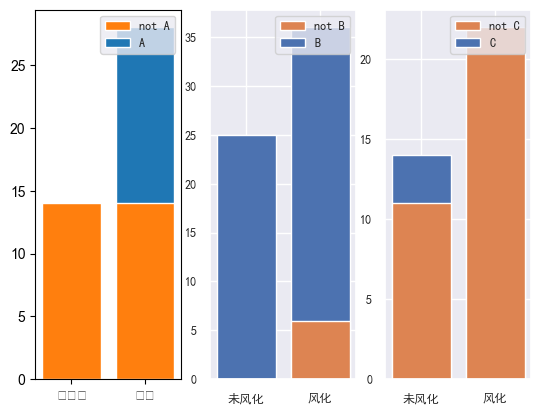

In [12]:
## 探索性绘图
import matplotlib.pyplot as plt
import seaborn as sns
a_table = pd.crosstab(data["纹饰_A"],data["表面风化_风化"],margins=True)
b_table = pd.crosstab(data["纹饰_B"],data["表面风化_风化"],margins=True)
c_table = pd.crosstab(data["纹饰_C"],data["表面风化_风化"],margins=True)
list1 = [a_table,b_table,c_table]

# 创建图像窗口
plt.figure()
# 创建子图
j=1
list2 = ["not A","A","not B","B","not C","C"]
for i in list1:
    plt.subplot(1,3,j)
    sns.set(font_scale=0.8)
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
    plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
    sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题

    categories = ["未风化","风化"]
    count_n = i.iloc[0][0:2].values
    count_y = i.iloc[1][0:2].values
    p1 = plt.bar(categories,count_n)
    p2 = plt.bar(categories,count_y)
    plt.legend((p2[0],p1[0]),(list2[2*j-2],list2[2*j-1]))
    j+=1
# 展示图片  
plt.show()
# data["纹饰_A"].value_counts()
# categories = ["风化","未风化"]
# len(data1[(data1["纹饰_A"]==1)&(data1["表面风化_风化"])])


我们尝试写一下卡方检验，使用scipy进行，其中返回值chi2检验统计量，p-value,dof自由度，expected预期频率

In [13]:
from scipy import stats
j=1
for ob in list1:
    f_ob = np.array([ob.iloc[0][0:2].values,ob.iloc[1][0:2].values])
    print(list2[2*j-1],"p值",stats.chi2_contingency(f_ob))
    j+=1


A p值 (2.443709009244722, 0.11799692869246177, 1, array([[14.55223881, 24.44776119],
       [10.44776119, 17.55223881]]))
B p值 (2.3662262555295337, 0.12398645179156087, 1, array([[22.76119403, 38.23880597],
       [ 2.23880597,  3.76119403]]))
C p值 (0.16892178083354534, 0.6810718381630008, 1, array([[12.68656716, 21.31343284],
       [12.31343284, 20.68656716]]))


重复上述过程对于颜色，类型进行检验

In [14]:
data2 = data[["类型_高钾","表面风化_风化"]]
data2.head()

,类型_高钾,表面风化_风化
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


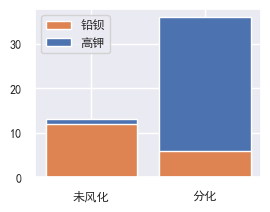

In [15]:
a_table = pd.crosstab(data["类型_高钾"],data["表面风化_风化"],margins=True)

list1 = [a_table]

# 创建图像窗口
plt.figure()
# 创建子图
j=1
list2 = ["铅钡","高钾"]
for i in list1:
    plt.subplot(2,2,j)
    sns.set(font_scale=0.8)
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
    plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
    sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题

    categories = ["未风化","分化"]
    count_n = i.iloc[0][0:2].values
    count_y = i.iloc[1][0:2].values
    p1 = plt.bar(categories,count_n)
    p2 = plt.bar(categories,count_y)
    plt.legend((p2[0],p1[0]),(list2[2*j-2],list2[2*j-1]))
    j+=1
# 展示图片  
plt.show()

In [16]:
from scipy import stats
j=1
for ob in list1:
    f_ob = np.array([ob.iloc[0][0:2].values,ob.iloc[1][0:2].values])
    print(list2[2*j-1],"p值",stats.chi2_contingency(f_ob))
    j+=1

高钾 p值 (7.431440179246302, 0.00640940260513365, 1, array([[18.28358209, 30.71641791],
       [ 6.71641791, 11.28358209]]))


In [17]:
data

,纹饰_A,纹饰_B,纹饰_C,类型_铅钡,类型_高钾,颜色_浅绿,颜色_浅蓝,颜色_深绿,颜色_深蓝,颜色_紫,颜色_绿,颜色_蓝绿,颜色_黑,表面风化_无风化,表面风化_风化,氧化钠(Na2O)
0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0.00
1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0.00
2,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.00
3,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.00
4,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0.00
63,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,2.71
64,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0.00
65,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0.00


In [18]:
data.columns

Index(['纹饰_A', '纹饰_B', '纹饰_C', '类型_铅钡', '类型_高钾', '颜色_浅绿', '颜色_浅蓝', '颜色_深绿',
       '颜色_深蓝', '颜色_紫', '颜色_绿', '颜色_蓝绿', '颜色_黑', '表面风化_无风化', '表面风化_风化',
       '氧化钠(Na2O)'],
      dtype='object')

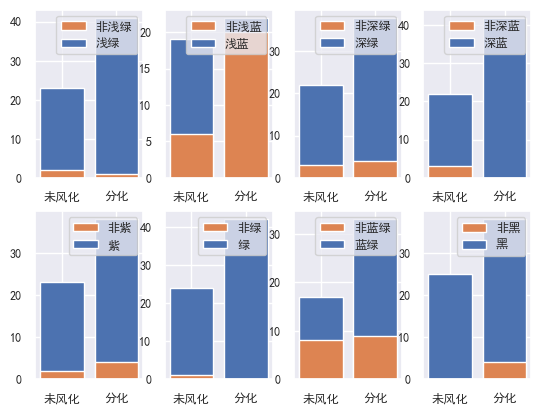

In [19]:
data3 = data[["颜色_浅绿","颜色_浅蓝","颜色_深绿","颜色_深蓝","颜色_紫","颜色_绿","颜色_蓝绿","颜色_黑","表面风化_风化"]]
table1 = pd.crosstab(data["颜色_浅绿"],data["表面风化_风化"],margins=True)
table2 = pd.crosstab(data["颜色_浅蓝"],data["表面风化_风化"],margins=True)
table3 = pd.crosstab(data["颜色_深绿"],data["表面风化_风化"],margins=True)
table4 = pd.crosstab(data["颜色_深蓝"],data["表面风化_风化"],margins=True)
table5 = pd.crosstab(data["颜色_紫"],data["表面风化_风化"],margins=True)
table6 = pd.crosstab(data["颜色_绿"],data["表面风化_风化"],margins=True)
table7 = pd.crosstab(data["颜色_蓝绿"],data["表面风化_风化"],margins=True)
table8 = pd.crosstab(data["颜色_黑"],data["表面风化_风化"],margins=True)

list1 = [table1,table2,table3,table4,table5,table6,table7,table8]

# 创建图像窗口
plt.figure()
# 创建子图
j=1
list2 = ["非浅绿","浅绿","非浅蓝","浅蓝","非深绿","深绿","非深蓝","深蓝","非紫","紫","非绿","绿","非蓝绿","蓝绿","非黑","黑"]
for i in list1:
    plt.subplot(2,4,j)
    sns.set(font_scale=0.8)
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
    plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
    sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题

    categories = ["未风化","分化"]
    count_n = i.iloc[0][0:2].values
    count_y = i.iloc[1][0:2].values
    p1 = plt.bar(categories,count_n)
    p2 = plt.bar(categories,count_y)
    plt.legend((p2[0],p1[0]),(list2[2*j-2],list2[2*j-1]))
    j+=1
# 展示图片  
plt.show()

In [20]:
from scipy import stats
j=1
for ob in list1:
    f_ob = np.array([ob.iloc[0][0:2].values,ob.iloc[1][0:2].values])
    print(list2[2*j-1],"p值",stats.chi2_contingency(f_ob))
    j+=1

浅绿 p值 (0.21610491071428584, 0.6420239438865225, 1, array([[23.88059701, 40.11940299],
       [ 1.11940299,  1.88059701]]))
浅蓝 p值 (2.7541202090592325, 0.09700416450588568, 1, array([[15.29850746, 25.70149254],
       [ 9.70149254, 16.29850746]]))
深绿 p值 (0.0, 1.0, 1, array([[22.3880597, 37.6119403],
       [ 2.6119403,  4.3880597]]))
深蓝 p值 (2.8435949900793656, 0.09173875598809793, 1, array([[23.88059701, 40.11940299],
       [ 1.11940299,  1.88059701]]))
紫 p值 (0.0, 1.0, 1, array([[22.76119403, 38.23880597],
       [ 2.23880597,  3.76119403]]))
绿 p值 (0.06985209235209233, 0.7915522551684074, 1, array([[24.62686567, 41.37313433],
       [ 0.37313433,  0.62686567]]))
蓝绿 p值 (0.450889355742297, 0.5019129158294906, 1, array([[18.65671642, 31.34328358],
       [ 6.34328358, 10.65671642]]))
黑 p值 (1.1197685185185184, 0.28996830334688095, 1, array([[23.50746269, 39.49253731],
       [ 1.49253731,  2.50746269]]))


下面我们进行相关性分析：使用spearman相关系数

In [21]:
df = pd.read_excel("1.1.xlsx")



In [22]:
df2 = df[["纹饰","类型","颜色","表面风化"]]
df2["纹饰"] = LabelEncoder().fit_transform(np.array(df2["纹饰"])).reshape(-1,1)
df2["表面风化"] = LabelEncoder().fit_transform(np.array(df2["表面风化"])).reshape(-1,1)
df2["类型"] = LabelEncoder().fit_transform(np.array(df2["类型"])).reshape(-1,1)
df2["颜色"] = LabelEncoder().fit_transform(np.array(df2["颜色"])).reshape(-1,1)

print(df2.corr('spearman'))

            纹饰        类型        颜色      表面风化
纹饰    1.000000 -0.134535 -0.223416  0.047862
类型   -0.134535  1.000000  0.412708 -0.316228
颜色   -0.223416  0.412708  1.000000  0.069605
表面风化  0.047862 -0.316228  0.069605  1.000000


C:\Users\zyy\AppData\Local\Temp\ipykernel_7364\2616648597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["纹饰"] = LabelEncoder().fit_transform(np.array(df2["纹饰"])).reshape(-1,1)
C:\Users\zyy\AppData\Local\Temp\ipykernel_7364\2616648597.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["表面风化"] = LabelEncoder().fit_transform(np.array(df2["表面风化"])).reshape(-1,1)
C:\Users\zyy\AppData\Local\Temp\ipykernel_7364\2616648597.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

<AxesSubplot:>

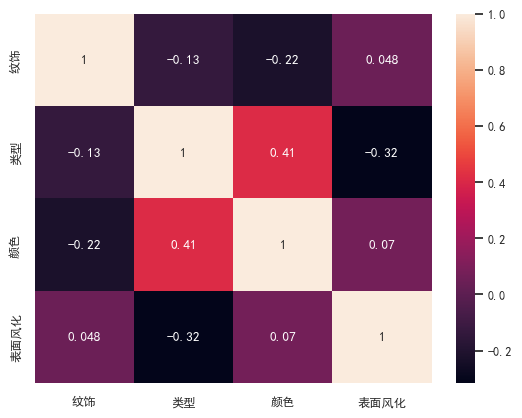

In [23]:
spearman_matrix = df2.corr('spearman')
sns.heatmap(spearman_matrix, annot=True)

此时我们已经可以看出类型所产生的影响是最大的，这与接下来我们继续讨论类型与分化是可以理解的

问题1.2：基于这些玻璃文物的类型，分析文物样品表面有无风化化学成分含量的统计规律；

In [24]:
data2=pd.read_excel('附件.xlsx',sheet_name='表单2')
data=pd.read_excel('附件.xlsx',sheet_name='表单1')

In [25]:
data2.describe()

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
count,69.000000,19.000000,41.000000,61.000000,44.00000,68.000000,45.000000,64.000000,58.000000,53.000000,59.000000,46.000000,7.000000,8.000000
mean,49.377826,3.052105,3.338537,2.781311,1.08250,4.027647,1.310889,2.082500,28.266034,9.834151,3.055763,0.381522,0.744286,5.050000
std,24.045914,1.820280,4.617057,2.289300,0.46706,3.046158,1.214232,2.228402,18.202676,8.335960,3.621935,0.241127,0.820099,6.553948
min,3.720000,0.800000,0.110000,0.210000,0.47000,0.450000,0.170000,0.110000,0.110000,0.000000,0.070000,0.040000,0.000000,0.360000
25%,29.150000,2.110000,0.250000,0.870000,0.71000,1.865000,0.350000,0.700000,16.032500,4.880000,0.350000,0.222500,0.315000,0.450000
50%,51.540000,2.710000,0.440000,2.080000,1.01000,3.370000,1.030000,1.145000,28.910000,7.950000,1.170000,0.340000,0.440000,2.270000
75%,65.180000,3.295000,7.370000,4.240000,1.32250,5.397500,1.860000,3.040000,42.517500,10.830000,5.105000,0.470000,0.890000,6.502500
max,96.770000,7.920000,14.520000,8.700000,2.73000,14.340000,6.040000,10.570000,70.210000,35.450000,14.130000,1.120000,2.360000,15.950000


In [26]:
data2.head()

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,01,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39
1,02,36.28,NaN,1.05,2.34,1.18,5.73,1.86,0.26,47.43,NaN,3.57,0.19,NaN,NaN
2,03部位1,87.05,NaN,5.19,2.01,NaN,4.06,NaN,0.78,0.25,NaN,0.66,NaN,NaN,NaN
3,03部位2,61.71,NaN,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,NaN,NaN
4,04,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.18,NaN,NaN,0.79,NaN,NaN,0.36


In [27]:
data2['文物编号']=data2['文物采样点'].apply(lambda x:int(str(x)[:2]))

在缺失值处理时，使用众数填充数据集众数不唯一，如果直接使用mode()填充很可能导致填充失败，所以要再mode()后加上一个索引[0]。我们把原来要删去的颜色填充为众数，进行进一步分析

In [28]:
data['颜色'].fillna(data['颜色'].mode()[0],inplace=True)
data

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
1,2,A,铅钡,浅蓝,风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化
5,6,A,高钾,蓝绿,无风化
6,7,B,高钾,蓝绿,风化
7,8,C,铅钡,紫,风化
8,9,B,高钾,蓝绿,风化
9,10,B,高钾,蓝绿,风化


In [29]:
data2.head()

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),文物编号
0,01,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39,1
1,02,36.28,NaN,1.05,2.34,1.18,5.73,1.86,0.26,47.43,NaN,3.57,0.19,NaN,NaN,2
2,03部位1,87.05,NaN,5.19,2.01,NaN,4.06,NaN,0.78,0.25,NaN,0.66,NaN,NaN,NaN,3
3,03部位2,61.71,NaN,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,NaN,NaN,3
4,04,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.18,NaN,NaN,0.79,NaN,NaN,0.36,4


In [30]:
data2.isnull().sum()

文物采样点           0
二氧化硅(SiO2)      0
氧化钠(Na2O)      50
氧化钾(K2O)       28
氧化钙(CaO)        8
氧化镁(MgO)       25
氧化铝(Al2O3)      1
氧化铁(Fe2O3)     24
氧化铜(CuO)        5
氧化铅(PbO)       11
氧化钡(BaO)       16
五氧化二磷(P2O5)    10
氧化锶(SrO)       23
氧化锡(SnO2)      62
二氧化硫(SO2)      61
文物编号            0
dtype: int64

In [31]:
data2.fillna(0,inplace=True) ## 填充空缺

In [32]:
data2.isnull().sum() ## 检查一遍

文物采样点          0
二氧化硅(SiO2)     0
氧化钠(Na2O)      0
氧化钾(K2O)       0
氧化钙(CaO)       0
氧化镁(MgO)       0
氧化铝(Al2O3)     0
氧化铁(Fe2O3)     0
氧化铜(CuO)       0
氧化铅(PbO)       0
氧化钡(BaO)       0
五氧化二磷(P2O5)    0
氧化锶(SrO)       0
氧化锡(SnO2)      0
二氧化硫(SO2)      0
文物编号           0
dtype: int64

In [33]:
# 为了防止02部位1,2的影响，我们将两个表merge一下
data_merge=pd.merge(data,data2,on="文物编号")
data_merge

,文物编号,纹饰,类型,颜色,表面风化,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,1,C,高钾,蓝绿,无风化,01,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,2,A,铅钡,浅蓝,风化,02,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,3,A,高钾,蓝绿,无风化,03部位1,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,3,A,高钾,蓝绿,无风化,03部位2,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,4,A,高钾,蓝绿,无风化,04,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,54,C,铅钡,浅蓝,风化,54严重风化点,17.11,0.00,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00
65,55,C,铅钡,绿,无风化,55,49.01,2.71,0.00,1.13,0.00,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00
66,56,C,铅钡,蓝绿,风化,56,29.15,0.00,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00
67,57,C,铅钡,蓝绿,风化,57,25.42,0.00,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00


In [34]:
## 将其保存到1.3
data_merge.to_excel('1.3.xlsx',index=None)

因为我们刚才在做相关分析的时候已经发现，类型对于文物的风化的影响是最大的，所以此处我们主要研究：
分类汇总

变量：
分组变量:{类型，表面风化}；汇总变量:{二氧化硅(SiO2)，氧化钠(Na2O)，氧化钾(K2O)，氧化钙(CaO)，氧化镁(MgO)，氧化铝(Al2O3)，氧化铁(Fe2O3)，氧化铜(CuO)，氧化铅(PbO)，氧化钡(BaO)，五氧化二磷(P2O5)，氧化锶(SrO)，氧化锡(SnO2)，二氧化硫(SO2)}

参数：
汇总类型:{均值，中位数，标准差，最大值，最小值}

In [35]:
data_merge.head()

,文物编号,纹饰,类型,颜色,表面风化,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,1,C,高钾,蓝绿,无风化,01,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,2,A,铅钡,浅蓝,风化,02,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,3,A,高钾,蓝绿,无风化,03部位1,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,3,A,高钾,蓝绿,无风化,03部位2,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,4,A,高钾,蓝绿,无风化,04,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36


In [36]:
data_merge.describe() 

,文物编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.00000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,30.043478,49.377826,0.840435,1.983768,2.458841,0.69029,3.969275,0.854928,1.931594,23.759855,7.553768,2.612899,0.254348,0.075507,0.585507
std,17.220401,24.045914,1.662282,3.907251,2.329997,0.64239,3.062307,1.161698,2.212785,19.656536,8.403383,3.516164,0.267018,0.332542,2.659735
min,1.000000,3.720000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,29.150000,0.000000,0.000000,0.680000,0.00000,1.850000,0.000000,0.550000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
50%,30.000000,51.540000,0.000000,0.210000,1.600000,0.66000,3.330000,0.330000,1.090000,22.050000,6.220000,0.940000,0.220000,0.000000,0.000000
75%,45.000000,65.180000,0.920000,0.740000,3.510000,1.14000,5.380000,1.330000,2.990000,40.240000,10.290000,4.240000,0.410000,0.000000,0.000000
max,58.000000,96.770000,7.920000,14.520000,8.700000,2.73000,14.340000,6.040000,10.570000,70.210000,35.450000,14.130000,1.120000,2.360000,15.950000


In [37]:
fenghua_y = data_merge[data_merge["表面风化"]=="风化"]
fenghua_n = data_merge[data_merge["表面风化"]=="无风化"]

In [38]:
fenghua_y["类型"].describe()

count     42
unique     2
top       铅钡
freq      36
Name: 类型, dtype: object

In [39]:
fenghua_y["类型"].value_counts()

铅钡    36
高钾     6
Name: 类型, dtype: int64

In [40]:
fenghua_n["类型"].describe()

count     27
unique     2
top       高钾
freq      14
Name: 类型, dtype: object

In [41]:
fenghua_n["类型"].value_counts()

高钾    14
铅钡    13
Name: 类型, dtype: int64

将数据分成四类，高钾分化，高钾未分化，铅钡分化，铅钡未分化

In [42]:
fenghua_y_g = fenghua_y[fenghua_y["类型"]=="高钾"]
fenghua_y_q = fenghua_y[fenghua_y["类型"]=="铅钡"]
fenghua_n_g = fenghua_n[fenghua_n["类型"]=="高钾"]
fenghua_n_q = fenghua_n[fenghua_n["类型"]=="铅钡"]

In [43]:
fenghua_n_g.describe()

,文物编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,10.142857,67.027857,0.976429,8.937143,4.570714,1.058571,5.899286,1.804286,2.272143,0.380000,0.512857,1.233571,0.035714,0.168571,0.087143
std,6.746591,8.415473,1.399580,3.757785,3.441202,0.625052,2.998424,1.566955,1.594790,0.547737,0.929164,1.387275,0.047021,0.630737,0.174595
min,1.000000,59.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.250000,61.612500,0.000000,7.387500,0.502500,0.707500,3.962500,0.635000,1.075000,0.000000,0.000000,0.360000,0.000000,0.000000,0.000000
50%,9.500000,63.825000,0.000000,9.545000,5.640000,1.065000,6.170000,1.900000,2.180000,0.190000,0.000000,0.865000,0.000000,0.000000,0.000000
75%,15.750000,68.910000,2.115000,11.947500,7.292500,1.552500,7.235000,2.385000,3.277500,0.325000,0.727500,1.245000,0.067500,0.000000,0.000000
max,21.000000,87.050000,3.380000,14.520000,8.700000,1.980000,11.150000,6.040000,5.090000,1.620000,2.860000,4.500000,0.120000,2.360000,0.470000


In [44]:
fenghua_n_q.describe()

,文物编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,35.769231,53.443846,0.771538,0.258462,1.231538,0.492308,3.194615,0.933077,1.556923,23.593846,10.499231,0.903846,0.296923,0.064615,0.281538
std,9.942785,14.587271,1.538310,0.398117,1.457703,0.545469,1.385241,1.445132,2.490918,9.094393,6.949784,1.570581,0.313751,0.157935,1.015101
min,20.000000,31.940000,0.000000,0.000000,0.000000,0.000000,1.440000,0.000000,0.000000,9.300000,3.420000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,37.360000,0.000000,0.000000,0.460000,0.000000,2.350000,0.000000,0.160000,16.550000,5.680000,0.130000,0.000000,0.000000,0.000000
50%,33.000000,55.210000,0.000000,0.150000,0.840000,0.510000,3.060000,0.000000,0.530000,22.050000,10.060000,0.200000,0.300000,0.000000,0.000000
75%,45.000000,65.910000,0.000000,0.250000,1.130000,0.890000,4.350000,1.510000,0.860000,29.140000,10.350000,1.410000,0.430000,0.000000,0.000000
max,55.000000,75.510000,4.660000,1.410000,4.490000,1.670000,5.450000,4.590000,8.460000,39.220000,26.230000,5.750000,0.910000,0.440000,3.660000


In [45]:
fenghua_y_g.describe()

,文物编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
count,6.000000,6.000000,6.0,6.000000,6.00000,6.000000,6.00000,6.000000,6.000000,6.0,6.0,6.000000,6.0,6.0,6.0
mean,14.500000,93.963333,0.0,0.543333,0.87000,0.196667,1.93000,0.265000,1.561667,0.0,0.0,0.280000,0.0,0.0,0.0
std,8.068457,1.733617,0.0,0.445182,0.48777,0.306311,0.96449,0.069498,0.934824,0.0,0.0,0.209952,0.0,0.0,0.0
min,7.000000,92.350000,0.0,0.000000,0.21000,0.000000,0.81000,0.170000,0.550000,0.0,0.0,0.000000,0.0,0.0,0.0
25%,9.250000,92.652500,0.0,0.147500,0.64500,0.000000,1.35500,0.215000,1.015000,0.0,0.0,0.165000,0.0,0.0,0.0
50%,11.000000,93.505000,0.0,0.665000,0.83000,0.000000,1.72000,0.275000,1.545000,0.0,0.0,0.280000,0.0,0.0,0.0
75%,19.500000,94.837500,0.0,0.875000,1.03750,0.405000,2.37750,0.312500,1.625000,0.0,0.0,0.357500,0.0,0.0,0.0
max,27.000000,96.770000,0.0,1.010000,1.66000,0.640000,3.50000,0.350000,3.240000,0.0,0.0,0.610000,0.0,0.0,0.0


In [46]:
fenghua_y_q.describe()

,文物编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,38.305556,33.614722,0.952500,0.142778,2.345556,0.700833,3.838333,0.555833,1.996111,36.871944,10.487222,4.155278,0.366389,0.055833,0.986667
std,15.291117,17.221484,1.920001,0.214711,1.611577,0.656142,3.412626,0.691964,2.487959,15.163722,8.867533,4.150624,0.245265,0.231620,3.608541
min,2.000000,3.720000,0.000000,0.000000,0.000000,0.000000,0.450000,0.000000,0.000000,12.310000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.500000,21.047500,0.000000,0.000000,1.030000,0.000000,1.615000,0.000000,0.695000,24.797500,5.912500,0.302500,0.220000,0.000000,0.000000
50%,42.000000,29.395000,0.000000,0.000000,2.205000,0.710000,3.010000,0.305000,1.000000,39.795000,8.150000,3.350000,0.340000,0.000000,0.000000
75%,50.250000,50.772500,0.995000,0.270000,3.190000,1.165000,4.837500,0.902500,2.787500,46.767500,11.125000,7.485000,0.470000,0.000000,0.000000
max,58.000000,68.080000,7.920000,1.050000,6.400000,2.730000,14.340000,2.740000,10.570000,70.210000,35.450000,14.130000,1.120000,1.310000,15.950000


In [47]:
fenghua_y_g.mean()

C:\Users\zyy\AppData\Local\Temp\ipykernel_7364\1946100612.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fenghua_y_g.mean()


文物编号           1.450000e+01
文物采样点          1.181835e+10
二氧化硅(SiO2)     9.396333e+01
氧化钠(Na2O)      0.000000e+00
氧化钾(K2O)       5.433333e-01
氧化钙(CaO)       8.700000e-01
氧化镁(MgO)       1.966667e-01
氧化铝(Al2O3)     1.930000e+00
氧化铁(Fe2O3)     2.650000e-01
氧化铜(CuO)       1.561667e+00
氧化铅(PbO)       0.000000e+00
氧化钡(BaO)       0.000000e+00
五氧化二磷(P2O5)    2.800000e-01
氧化锶(SrO)       0.000000e+00
氧化锡(SnO2)      0.000000e+00
二氧化硫(SO2)      0.000000e+00
dtype: float64

In [48]:
fenghua_y.columns.values[5:]

array(['文物采样点', '二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)',
       '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)',
       '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)'],
      dtype=object)

C:\Users\zyy\AppData\Local\Temp\ipykernel_7364\2602194088.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  buy_number_fenghua_y = fenghua_y.mean().values[1:]
C:\Users\zyy\AppData\Local\Temp\ipykernel_7364\2602194088.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  buy_number_fenghua_n = fenghua_n.mean().values[1:]


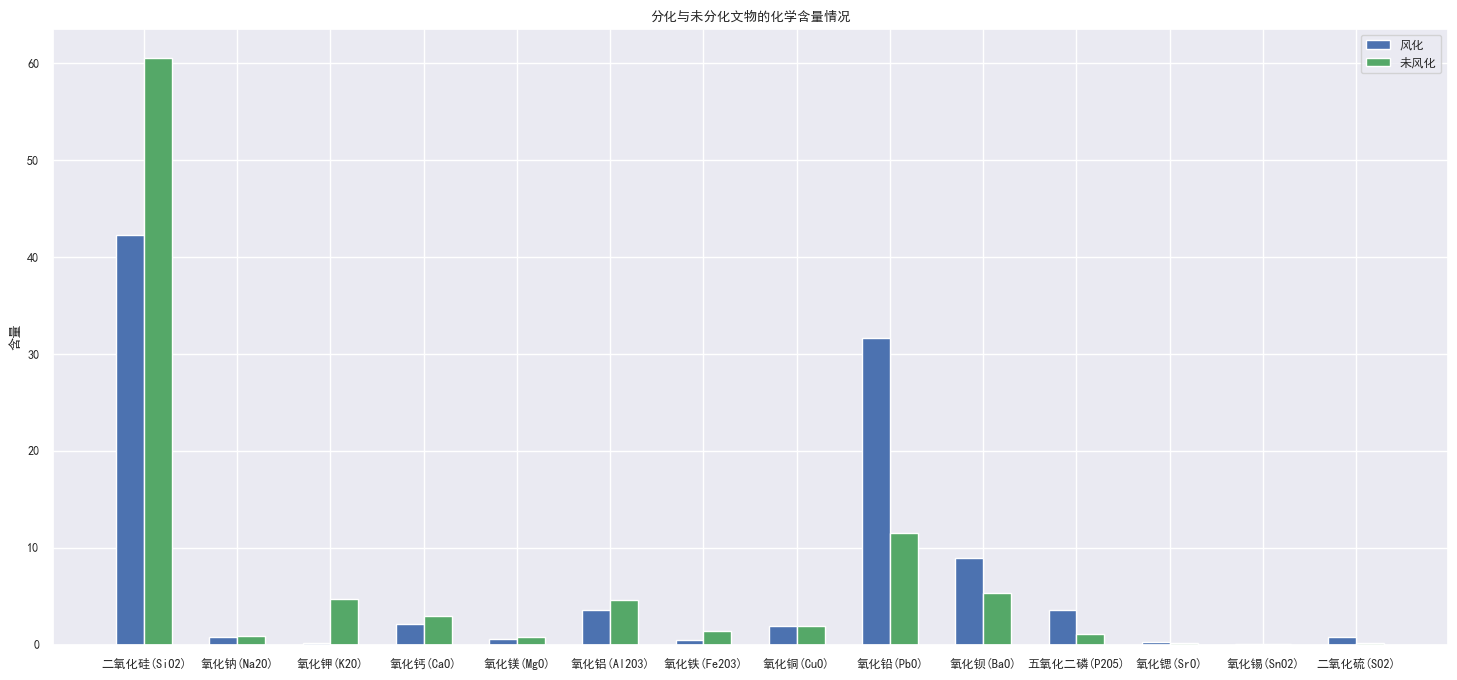

In [49]:
## 绘图可以看到风化与未风化个元素的含量是由明显区别的

# 这两行代码解决 plt 中文显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize']=(18,8)

# 输入统计数据
type_stone = fenghua_y.columns.values[6:]
buy_number_fenghua_y = fenghua_y.mean().values[1:]
buy_number_fenghua_n = fenghua_n.mean().values[1:]

bar_width = 0.3  # 条形宽度
index_fenghua_y = np.arange(len(type_stone))  # 男生条形图的横坐标
index_fenghua_n = index_fenghua_y + bar_width  # 女生条形图的横坐标

# 使用两次 bar 函数画出两组条形图
plt.bar(index_fenghua_y, height=buy_number_fenghua_y, width=bar_width, color='b', label='风化')
plt.bar(index_fenghua_n, height=buy_number_fenghua_n, width=bar_width, color='g', label='未风化')

plt.legend()  # 显示图例
plt.xticks(index_fenghua_y + bar_width/2, type_stone)  # 让横坐标轴刻度显示 waters 里的饮用水， index_male + bar_width/2 为横坐标轴刻度的位置
plt.ylabel('含量')  # 纵坐标轴标题
plt.title('分化与未分化文物的化学含量情况')  # 图形标题

plt.show()

通过主成分分析法，代码在problem2PCA.ipynb（其实是看图感觉出来的）（但是我感觉高钾和铅钡也会有所不同）
所以再画一个图


In [50]:
len(fenghua_y_g.mean().values[1:])

C:\Users\zyy\AppData\Local\Temp\ipykernel_7364\1970814032.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  len(fenghua_y_g.mean().values[1:])


15

In [51]:
fenghua_y_g.mean()[0]

C:\Users\zyy\AppData\Local\Temp\ipykernel_7364\1304243390.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fenghua_y_g.mean()[0]


14.5

In [52]:
len(fenghua_y_q.columns.values[6:])

14

C:\Users\zyy\AppData\Local\Temp\ipykernel_7364\3543458165.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  buy_number_fenghua_y_g = fenghua_y_g.mean().values[2:]
C:\Users\zyy\AppData\Local\Temp\ipykernel_7364\3543458165.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  buy_number_fenghua_n_g = fenghua_n_g.mean().values[1:]
C:\Users\zyy\AppData\Local\Temp\ipykernel_7364\3543458165.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  buy_number_fenghua_y_q = fenghua_y_q.mean().val

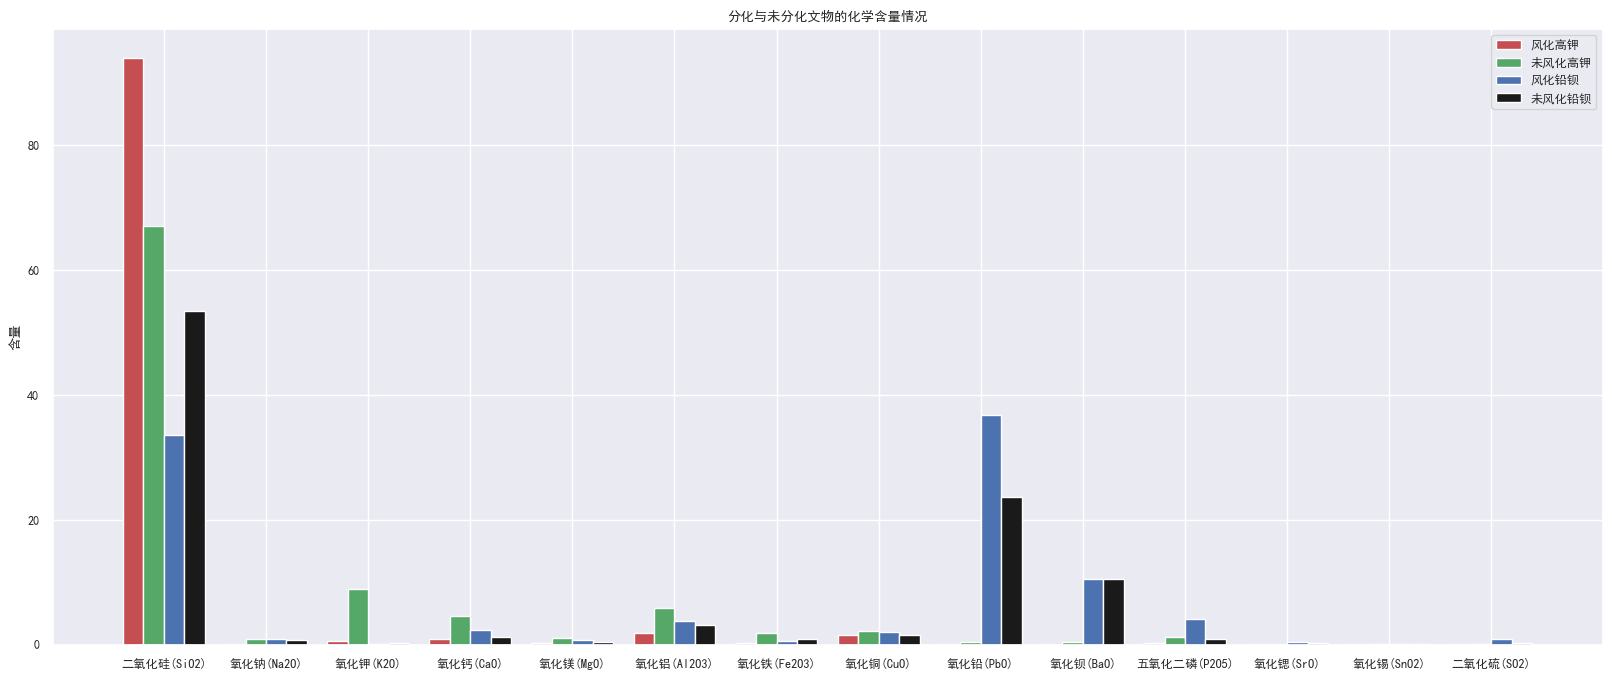

In [53]:
## 绘图可以看到风化与未风化个元素的含量是由明显区别的

# 这两行代码解决 plt 中文显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize']=(20,8)

# 输入统计数据
type_stone = fenghua_y_q.columns.values[6:]
buy_number_fenghua_y_g = fenghua_y_g.mean().values[2:]
buy_number_fenghua_n_g = fenghua_n_g.mean().values[1:]
buy_number_fenghua_y_q = fenghua_y_q.mean().values[1:]
buy_number_fenghua_n_q = fenghua_n_q.mean().values[1:]

bar_width = 0.2  # 条形宽度
index_fenghua_y_g = np.arange(len(type_stone))  # 风化高钾的横坐标
index_fenghua_n_g = index_fenghua_y_g + bar_width  # 未分化高钾的横坐标
index_fenghua_y_q = index_fenghua_n_g + bar_width  # 风化高钾的横坐标
index_fenghua_n_q = index_fenghua_y_q + bar_width  # 未分化高钾的横坐标

# 使用两次 bar 函数画出两组条形图
plt.bar(index_fenghua_y_g, height=buy_number_fenghua_y_g, width=bar_width, color='r', label='风化高钾')
plt.bar(index_fenghua_n_g, height=buy_number_fenghua_n_g, width=bar_width, color='g', label='未风化高钾')
plt.bar(index_fenghua_y_q, height=buy_number_fenghua_y_q, width=bar_width, color='b', label='风化铅钡')
plt.bar(index_fenghua_n_q, height=buy_number_fenghua_n_q, width=bar_width, color='k', label='未风化铅钡')

plt.legend()  # 显示图例
plt.xticks(index_fenghua_y_g + bar_width*(1.5), type_stone)  # 让横坐标轴刻度显示 waters 里的饮用水， index_male + bar_width/2 为横坐标轴刻度的位置
plt.ylabel('含量')  # 纵坐标轴标题
plt.title('分化与未分化文物的化学含量情况')  # 图形标题

plt.show()

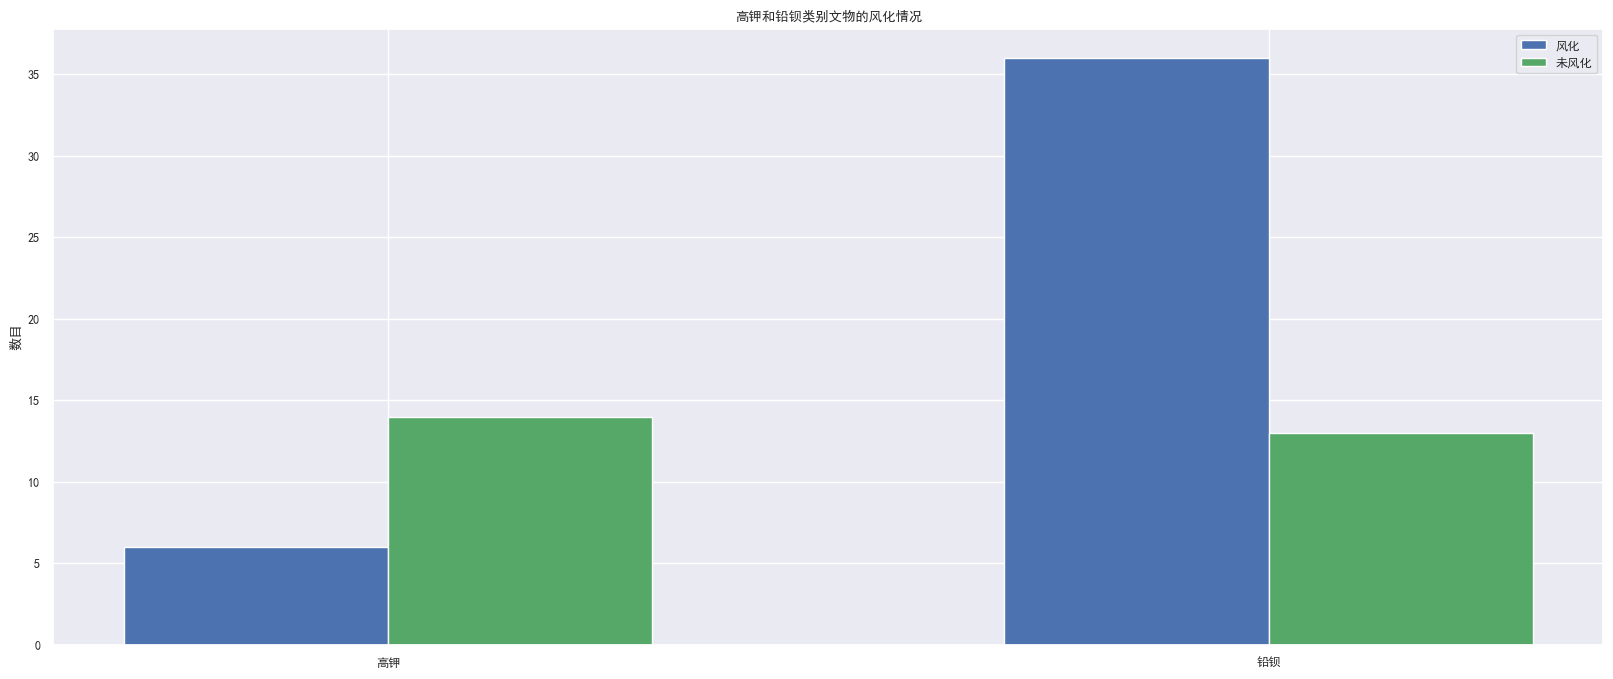

In [54]:
# 这两行代码解决 plt 中文显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 输入统计数据
type_stone = ('高钾','铅钡')
buy_number_fenghua_y = [6,36]
buy_number_fenghua_n = [14,13]

bar_width = 0.3  # 条形宽度
index_fenghua_y = np.arange(len(type_stone))  # 男生条形图的横坐标
index_fenghua_n = index_fenghua_y + bar_width  # 女生条形图的横坐标

# 使用两次 bar 函数画出两组条形图
plt.bar(index_fenghua_y, height=buy_number_fenghua_y, width=bar_width, color='b', label='风化')
plt.bar(index_fenghua_n, height=buy_number_fenghua_n, width=bar_width, color='g', label='未风化')

plt.legend()  # 显示图例
plt.xticks(index_fenghua_y + bar_width/2, type_stone)  # 让横坐标轴刻度显示 waters 里的饮用水， index_male + bar_width/2 为横坐标轴刻度的位置
plt.ylabel('数目')  # 纵坐标轴标题
plt.title('高钾和铅钡类别文物的风化情况')  # 图形标题

plt.show()

1.3 预测？我准备尝试的方法是先通过主成分分析??主成分分析好像不太适用：由于现在我们只有两个变量，我们不妨思考是否可以添加其他的变量来辅助我们的求解，颜色和纹饰也加入到我们的求解


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

list=[]
X=pd.get_dummies(data_merge[['纹饰', '类型', '颜色', '表面风化']])
for i in ['二氧化硅(SiO2)', '氧化钠(Na2O)',
       '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)',
       '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)',
       '氧化锡(SnO2)', '二氧化硫(SO2)']:
        #线性回归
    y=data_merge[i]
    print(i)
    model=LinearRegression()
    model.fit(X, y)
    print(r2_score(y,model.predict(X)))
    if r2_score(y,model.predict(X))>0.73:
        list.append(i)
        list.append(r2_score(y,model.predict(X)))
    print('\n')
    


二氧化硅(SiO2)
0.7492159850381487


氧化钠(Na2O)
0.2216929532026266


氧化钾(K2O)
0.8320824500095053


氧化钙(CaO)
0.29690466270933114


氧化镁(MgO)
0.35988923531299133


氧化铝(Al2O3)
0.45698996014050186


氧化铁(Fe2O3)
0.2737124883076826


氧化铜(CuO)
0.43616970007503575


氧化铅(PbO)
0.767669369888091


氧化钡(BaO)
0.6898980096863909


五氧化二磷(P2O5)
0.3519134366552039


氧化锶(SrO)
0.42278641178325393


氧化锡(SnO2)
0.4923290869389815


二氧化硫(SO2)
0.41685208346354274




In [56]:
print(list)

['二氧化硅(SiO2)', 0.7492159850381487, '氧化钾(K2O)', 0.8320824500095053, '氧化铅(PbO)', 0.767669369888091]


线性回归会发现，好像并不是特别符合我们的要求，于是我们尝试使用神经网络

In [57]:
data_merge

,文物编号,纹饰,类型,颜色,表面风化,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,1,C,高钾,蓝绿,无风化,01,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,2,A,铅钡,浅蓝,风化,02,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,3,A,高钾,蓝绿,无风化,03部位1,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,3,A,高钾,蓝绿,无风化,03部位2,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,4,A,高钾,蓝绿,无风化,04,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,54,C,铅钡,浅蓝,风化,54严重风化点,17.11,0.00,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00
65,55,C,铅钡,绿,无风化,55,49.01,2.71,0.00,1.13,0.00,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00
66,56,C,铅钡,蓝绿,风化,56,29.15,0.00,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00
67,57,C,铅钡,蓝绿,风化,57,25.42,0.00,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00


In [58]:
import torch
import pandas as pd
import tensorflow as tf
import numpy as np
# 1. 加载数据和标签

# 2. 设计网络结构
first_in, first_out, second_out = 15,  10, 1
model = torch.nn.Sequential(
    torch.nn.Linear(first_in, first_out),# 第一层输入向量的维数，第一层输出向量维数
    torch.nn.ReLU(),# 设置前面那一层的激活函数
    torch.nn.Linear(first_out, second_out), # 先就一层试试看
)

# 3. 设计损失函数
loss_fn = torch.nn.CrossEntropyLoss() # 定义损失函数类型，使用交叉熵

# 4.设置用于自动调节神经网络参数的优化器，以及超参数
learning_rate = 1e-4
## 定义优化器，使用随机梯度下降
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 5.训练神经网络，重复10次训练
X=pd.get_dummies(data_merge[['纹饰', '类型', '颜色', '表面风化']])

for t in range(10):
    for i, one_batch in enumerate(['二氧化硅(SiO2)', '氧化钠(Na2O)',
       '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)',
       '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)',
       '氧化锡(SnO2)', '二氧化硫(SO2)'],0):
        label_tensor = torch.tensor(np.array(data_merge[one_batch]),dtype=torch.long)
        data_tensor = torch.tensor(np.array(X[X.columns.values]),dtype=torch.float)
        data,label = data_tensor,label_tensor

        # 让神经网络根据现有的参数，根据当前的输入计算一个输出
        model_output = model(data)
        # 5.1 用所设计算损失(误差)函数计算误差
        loss = loss_fn(model_output, label.view(69,1).float())
        if i%500 == 0:
            print(loss)
        # 5.2 每次训练前清零之前计算的梯度(导数)
        optimizer.zero_grad()
        # 5.3 根据误差反向传播计算误差对各个权重的导数
        loss.backward()
        # 5.4 根据优化器里面的算法自动调整神经网络权重
        optimizer.step()

e:\download\python\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)
tensor(-0., grad_fn=<DivBackward1>)


In [59]:
# 6. 用这个神经网络解决你的问题，比如手写数字识别，输入一个图片矩阵，然后模型返回一个数字
# result_digit = model(img_mattrix)
# 保存模型
torch.save(model.state_dict(), './neural_network_fenghua.pth')

预测的处理结果放在了fenghua_y_n.xlsx（假装我们有三层隐藏层哈哈）(其实只有一层)

In [60]:
df = pd.read_excel("fenghua_y_n.xlsx")
df.head()

,文物编号,纹饰,类型,颜色,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,2,A,铅钡,浅蓝,风化,40.930,1.822,0.00,0.965,0.836,5.726,0.689,1.196,18.412,6.464,1.538,0.278,0.003,0.000
1,7,B,高钾,蓝绿,风化,89.594,0.000,0.15,0.055,0.000,0.840,0.347,1.206,0.000,0.000,0.000,0.000,0.000,0.000
2,8,C,铅钡,紫,风化,13.878,0.008,0.00,1.339,0.000,0.680,0.704,5.794,23.003,25.261,3.037,0.495,0.000,5.523
3,8,C,铅钡,紫,风化,13.878,0.008,0.00,1.339,0.000,0.680,0.704,5.794,23.003,25.261,3.037,0.495,0.000,5.523
4,9,B,高钾,蓝绿,风化,89.594,0.000,0.15,0.055,0.000,0.840,0.347,1.206,0.000,0.000,0.000,0.000,0.000,0.000


In [61]:
## 将其与风化_n合并
fenghua_n.columns

Index(['文物编号', '纹饰', '类型', '颜色', '表面风化', '文物采样点', '二氧化硅(SiO2)', '氧化钠(Na2O)',
       '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)',
       '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)',
       '氧化锡(SnO2)', '二氧化硫(SO2)'],
      dtype='object')

In [62]:
f1 = fenghua_n[['类型', '二氧化硅(SiO2)', '氧化钠(Na2O)',
       '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)',
       '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)',
       '氧化锡(SnO2)', '二氧化硫(SO2)']]

In [63]:
f2 = df[[ '类型','二氧化硅(SiO2)', '氧化钠(Na2O)',
       '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)',
       '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)',
       '氧化锡(SnO2)', '二氧化硫(SO2)']]

In [64]:
fenghua_nn = pd.concat([f1,f2])

In [65]:
## 合并到2.xlsx
fenghua_nn.to_excel("2.xlsx",index=False)

In [66]:
data_merge = pd.read_excel("2.xlsx")

In [67]:
data_merge.columns

Index(['类型', '二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)',
       '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)',
       '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)'],
      dtype='object')

In [68]:
# 现将85到105的数据清理掉
data_merge['sum']=0
for i in ['二氧化硅(SiO2)', '氧化钠(Na2O)',
       '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)',
       '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)',
       '氧化锡(SnO2)', '二氧化硫(SO2)']:
    data_merge['sum']+=data_merge[i]
    
data_merge=data_merge[(data_merge['sum']>85)&(data_merge['sum']<105)]
data_merge

,类型,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),sum
0,高钾,69.330,0.00,9.99,6.320,0.87,3.93,1.740,3.870,0.00,0.00,1.17,0.00,0.00,0.39,97.610
1,高钾,87.050,0.00,5.19,2.010,0.00,4.06,0.000,0.780,0.25,0.00,0.66,0.00,0.00,0.00,100.000
2,高钾,61.710,0.00,12.37,5.870,1.11,5.50,2.160,5.090,1.41,2.86,0.70,0.10,0.00,0.00,98.880
3,高钾,65.880,0.00,9.67,7.120,1.56,6.44,2.060,2.180,0.00,0.00,0.79,0.00,0.00,0.36,96.060
4,高钾,61.580,0.00,10.95,7.350,1.77,7.50,2.620,3.270,0.00,0.00,0.94,0.06,0.00,0.47,96.510
5,高钾,67.650,0.00,7.37,0.000,1.98,11.15,2.390,2.510,0.20,1.38,4.18,0.11,0.00,0.00,98.920
6,高钾,59.810,0.00,7.68,5.410,1.73,10.05,6.040,2.180,0.35,0.97,4.50,0.12,0.00,0.00,98.840
7,高钾,59.010,2.86,12.53,8.700,0.00,6.16,2.880,4.730,0.00,0.00,1.27,0.00,0.00,0.00,98.140
8,高钾,62.470,3.38,12.28,8.230,0.66,9.23,0.500,0.470,1.62,0.00,0.16,0.00,0.00,0.00,99.000
10,高钾,65.180,2.10,14.52,8.270,0.52,6.18,0.420,1.070,0.11,0.00,0.00,0.04,0.00,0.00,98.410


In [69]:
data_merge.reset_index(inplace=True,drop=True)
# 重新设置索引index，方便后续观察
data_merge

,类型,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),sum
0,高钾,69.330,0.00,9.99,6.320,0.87,3.93,1.740,3.870,0.00,0.00,1.17,0.00,0.00,0.39,97.610
1,高钾,87.050,0.00,5.19,2.010,0.00,4.06,0.000,0.780,0.25,0.00,0.66,0.00,0.00,0.00,100.000
2,高钾,61.710,0.00,12.37,5.870,1.11,5.50,2.160,5.090,1.41,2.86,0.70,0.10,0.00,0.00,98.880
3,高钾,65.880,0.00,9.67,7.120,1.56,6.44,2.060,2.180,0.00,0.00,0.79,0.00,0.00,0.36,96.060
4,高钾,61.580,0.00,10.95,7.350,1.77,7.50,2.620,3.270,0.00,0.00,0.94,0.06,0.00,0.47,96.510
5,高钾,67.650,0.00,7.37,0.000,1.98,11.15,2.390,2.510,0.20,1.38,4.18,0.11,0.00,0.00,98.920
6,高钾,59.810,0.00,7.68,5.410,1.73,10.05,6.040,2.180,0.35,0.97,4.50,0.12,0.00,0.00,98.840
7,高钾,59.010,2.86,12.53,8.700,0.00,6.16,2.880,4.730,0.00,0.00,1.27,0.00,0.00,0.00,98.140
8,高钾,62.470,3.38,12.28,8.230,0.66,9.23,0.500,0.470,1.62,0.00,0.16,0.00,0.00,0.00,99.000
9,高钾,65.180,2.10,14.52,8.270,0.52,6.18,0.420,1.070,0.11,0.00,0.00,0.04,0.00,0.00,98.410


问题 2 依据附件数据分析高钾玻璃、铅钡玻璃的分类规律；对于每个类别选择合适的化学成分对其进行亚类划分，给出具体的划分方法及划分结果，并对分类结果的合理性和敏感性 
进行分析。 

分解问题：

问题（1）：分析高钾玻璃、铅钡玻璃的分类规律；

构建一个可解释的机器学习分类模型，例如决策树、逻辑回归，以类型(高钾玻璃、铅钡玻璃)为Y，尽可能构建足够多的特征X，形成可解释的分类规律：我想尝试一下随机森林？有点小难，先试一下kmeans
变量X:{二氧化硅(SiO2)，氧化钠(Na2O)，氧化钾(K2O)，氧化钙(CaO)，氧化镁(MgO)，氧化铝(Al2O3)，氧化铁(Fe2O3)，氧化铜(CuO)，氧化铅(PbO)，氧化钡(BaO)，五氧化二磷(P2O5)，氧化锶(SrO)，氧化锡(SnO2)，二氧化硫(SO2)}；变量Y:{类型}

问题（2）：对于每个类别选择合适的化学成分对其进行亚类划分，给出具体的划分方法及划分结果；

分别对类别进行聚类模型，得分点关键在于亚类划分的可解释性以及划分效果。

问题（3）：对分类结果的合理性和敏感性进行分析。

对分类结果的合理性应该是放在问题（2）里面的，直接用一些量化划分聚类效果的评价指标进行评估就ok了，这里重点在于对前面使用的模型参数进行调整，分析模型的敏感性

2.1 分类规律：我们使用已经推算出来的未分化的数据进行统计：{均值，中位数，标准差，最大值，最小值}

In [70]:

KKK=data_merge[['类型','二氧化硅(SiO2)', '氧化钠(Na2O)',
       '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)',
       '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)',
       '氧化锡(SnO2)', '二氧化硫(SO2)']]
df1 = KKK[KKK['类型']=='高钾']
df1.describe()

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,75.187444,0.463333,6.270556,3.573333,0.719444,4.693333,1.403444,2.037000,0.274444,0.398889,0.935000,0.027778,0.131111,0.067778
std,12.628420,1.088707,5.456821,3.569525,0.754878,3.446374,1.545415,1.465812,0.514144,0.841629,1.339154,0.043866,0.556257,0.157164
min,59.010000,0.000000,0.000000,0.000000,0.000000,0.840000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.147500,0.000000,0.150000,0.055000,0.000000,0.840000,0.347000,1.206000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,73.005000,0.000000,7.525000,3.360000,0.590000,4.780000,0.460000,1.206000,0.000000,0.000000,0.680000,0.000000,0.000000,0.000000
75%,89.594000,0.000000,10.710000,6.920000,1.452500,6.377500,2.317500,3.080000,0.237500,0.000000,1.152500,0.055000,0.000000,0.000000
max,89.594000,3.380000,14.520000,8.700000,1.980000,11.150000,6.040000,5.090000,1.620000,2.860000,4.500000,0.120000,2.360000,0.470000


In [71]:
df2 = KKK[KKK['类型']=='铅钡']
df2.describe()

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,53.443846,0.771538,0.258462,1.231538,0.492308,3.194615,0.933077,1.556923,23.593846,10.499231,0.903846,0.296923,0.064615,0.281538
std,14.587271,1.538310,0.398117,1.457703,0.545469,1.385241,1.445132,2.490918,9.094393,6.949784,1.570581,0.313751,0.157935,1.015101
min,31.940000,0.000000,0.000000,0.000000,0.000000,1.440000,0.000000,0.000000,9.300000,3.420000,0.000000,0.000000,0.000000,0.000000
25%,37.360000,0.000000,0.000000,0.460000,0.000000,2.350000,0.000000,0.160000,16.550000,5.680000,0.130000,0.000000,0.000000,0.000000
50%,55.210000,0.000000,0.150000,0.840000,0.510000,3.060000,0.000000,0.530000,22.050000,10.060000,0.200000,0.300000,0.000000,0.000000
75%,65.910000,0.000000,0.250000,1.130000,0.890000,4.350000,1.510000,0.860000,29.140000,10.350000,1.410000,0.430000,0.000000,0.000000
max,75.510000,4.660000,1.410000,4.490000,1.670000,5.450000,4.590000,8.460000,39.220000,26.230000,5.750000,0.910000,0.440000,3.660000


In [72]:
df2.head()

,类型,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
11,铅钡,37.36,0.0,0.71,0.00,0.00,5.45,1.51,4.78,9.30,23.55,5.75,0.00,0.00,0.0
13,铅钡,31.94,0.0,0.00,0.47,0.00,1.59,0.00,8.46,29.14,26.23,0.14,0.91,0.00,0.0
14,铅钡,34.34,0.0,1.41,4.49,0.98,4.35,2.12,0.00,39.22,10.29,0.00,0.35,0.40,0.0
15,铅钡,36.93,0.0,0.00,4.24,0.51,3.86,2.74,0.00,37.74,10.35,1.41,0.48,0.44,0.0
16,铅钡,65.91,0.0,0.00,1.60,0.89,3.11,4.59,0.44,16.55,3.42,1.62,0.30,0.00,0.0


In [73]:
df2.reset_index(inplace=True,drop=True)


In [74]:
df2.mean()

C:\Users\zyy\AppData\Local\Temp\ipykernel_7364\3587575296.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.mean()


二氧化硅(SiO2)     53.443846
氧化钠(Na2O)       0.771538
氧化钾(K2O)        0.258462
氧化钙(CaO)        1.231538
氧化镁(MgO)        0.492308
氧化铝(Al2O3)      3.194615
氧化铁(Fe2O3)      0.933077
氧化铜(CuO)        1.556923
氧化铅(PbO)       23.593846
氧化钡(BaO)       10.499231
五氧化二磷(P2O5)     0.903846
氧化锶(SrO)        0.296923
氧化锡(SnO2)       0.064615
二氧化硫(SO2)       0.281538
dtype: float64

In [75]:
df1.columns.values[1:]

array(['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)',
       '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)',
       '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)'], dtype=object)

C:\Users\zyy\AppData\Local\Temp\ipykernel_7364\3496125062.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  buy_number_fenghua_y = np.array(df1.mean().values[0:],dtype=float)
C:\Users\zyy\AppData\Local\Temp\ipykernel_7364\3496125062.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  buy_number_fenghua_n = np.array(df2.mean().values[0:],dtype=float)


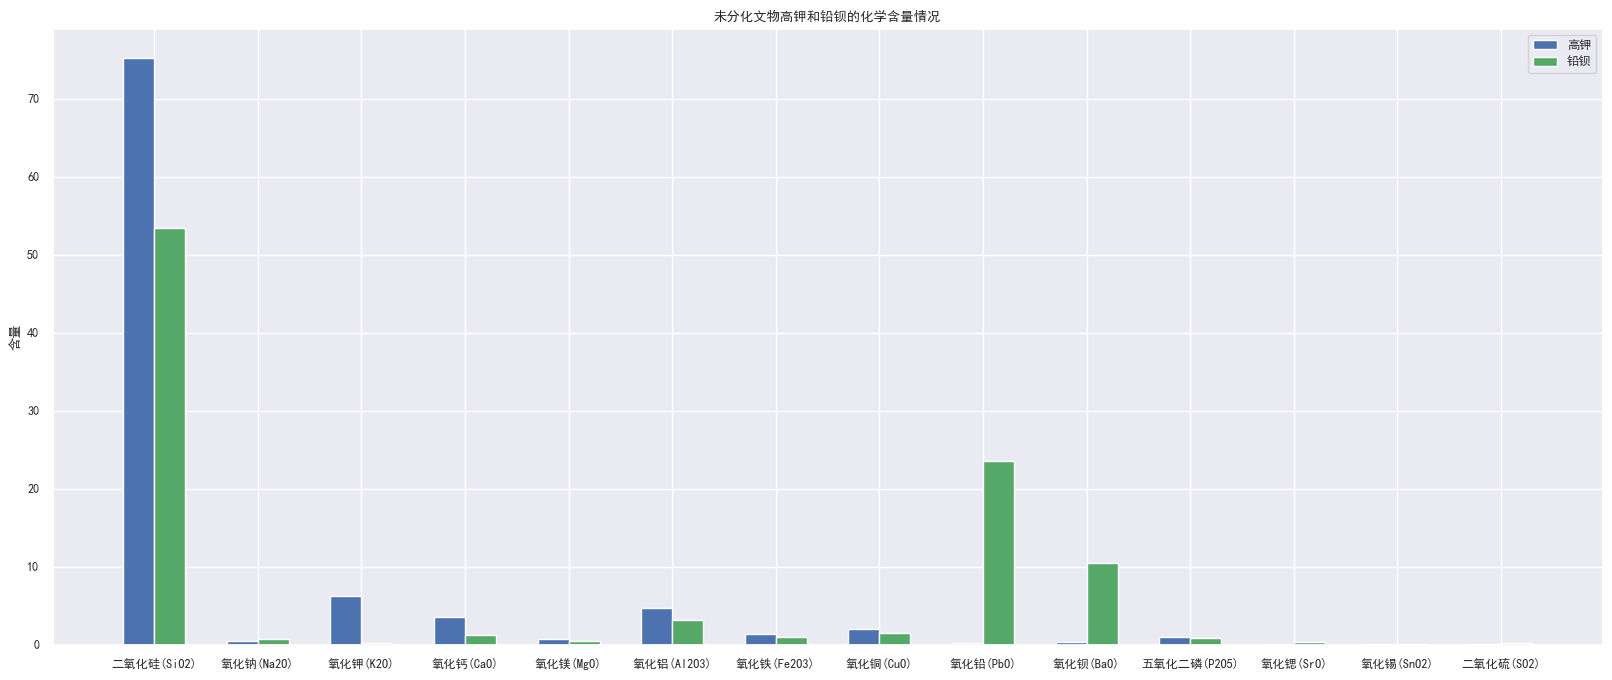

In [76]:
#画个图吧
# 绘图可以看到高钾与铅钡个元素的含量是由明显区别的（均为未风化）
plt.figure()
# 这两行代码解决 plt 中文显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize']=(18,8)

# 输入统计数据
type_stone = df1.columns.values[1:]
buy_number_fenghua_y = np.array(df1.mean().values[0:],dtype=float)
buy_number_fenghua_n = np.array(df2.mean().values[0:],dtype=float)

bar_width = 0.3  # 条形宽度
index_fenghua_y = np.arange(len(type_stone))  # 男生条形图的横坐标
index_fenghua_n = index_fenghua_y + bar_width  # 女生条形图的横坐标

# 使用两次 bar 函数画出两组条形图
plt.bar(index_fenghua_y, height=buy_number_fenghua_y, width=bar_width, color='b', label='高钾')
plt.bar(index_fenghua_n, height=buy_number_fenghua_n, width=bar_width, color='g', label='铅钡')

plt.legend()  # 显示图例
plt.xticks(index_fenghua_y + bar_width/2, type_stone)  # 让横坐标轴刻度显示 waters 里的饮用水， index_male + bar_width/2 为横坐标轴刻度的位置
plt.ylabel('含量')  # 纵坐标轴标题
plt.title('未分化文物高钾和铅钡的化学含量情况')  # 图形标题
plt.show()


In [77]:
type_stone.shape

(14,)

In [78]:
buy_number_fenghua_y.shape

(14,)

2.2 对于每个类别选择合适的化
学成分对其进行亚类划分，给出具体的划分方法及划分结果，并对分类结果的合理性和敏感性
进行分析。

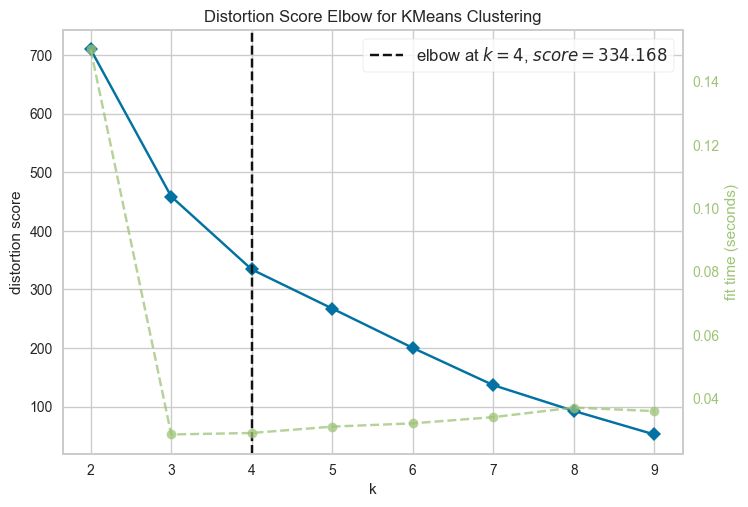

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=42), k=(2, 10))

In [79]:
# 先试一下kmeans类：
# 先分类一下高钾
# KKK[KKK['类型']=='高钾']
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

# 在机器学习的聚类问题上，聚类数目K值的选择其实是核心问题，一般采用的elbow method采取肘部那个点，这个就是合理性，也就是我们使用了惯性指标作为合理性的评估标准
Xk=KKK[KKK['类型']=='高钾']
Xk.reset_index(inplace=True,drop=True)
# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=42), Xk[Xk.columns[1:]], k=(2,10))

In [80]:
k_means = KMeans(n_clusters=4, random_state=42,n_init=1000)
# n_cluster 聚类的个数，random_state就是一个随机种子,n_init是做了1000次取最好那次
k_means.fit(Xk[Xk.columns[1:]])
# 我们对化学元素进行拟合
y_predict = k_means.predict(Xk[Xk.columns[1:]])
# 最终得到了predict数据
Xk['分类']=y_predict
Xk.head()

C:\Users\zyy\AppData\Local\Temp\ipykernel_7364\380289419.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xk['分类']=y_predict


,类型,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),分类
0,高钾,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,2
1,高钾,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,1
2,高钾,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,2
3,高钾,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,2
4,高钾,61.58,0.0,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.0,0.47,2


k-means对初始簇中心点是敏感的。也就是说，我们的多次取初值（1000）取最优，已经算基本实现了敏感性的问题。（所以我们就不需要做这一步），

In [81]:
## 下面我们对其敏感性的进行评估，当然elbow已经算合理性评估了

In [82]:
Xk.to_excel('2.1.高钾.xlsx',index=None)

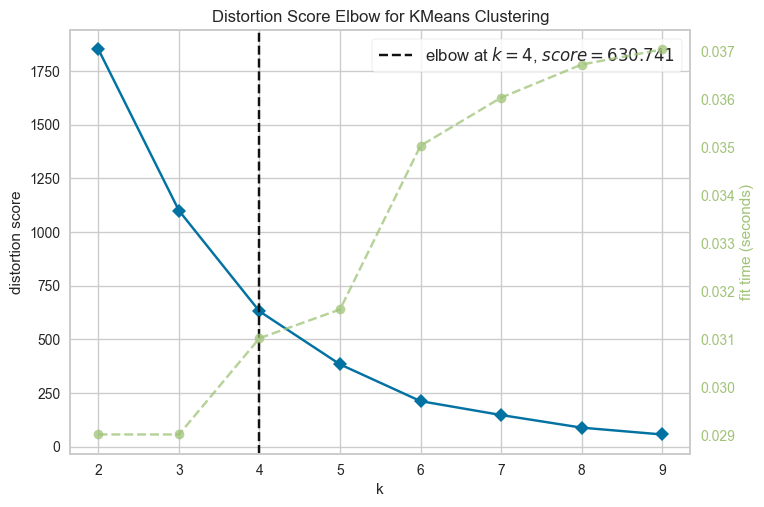

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=4), k=(2, 10))

In [83]:
# 同理
Xk=KKK[KKK['类型']=='铅钡']
Xk.reset_index(inplace=True,drop=True)
# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=4), Xk[Xk.columns[1:]], k=(2,10))

In [84]:
k_means = KMeans(n_clusters=4, random_state=4,n_init=10000)

k_means.fit(Xk[Xk.columns[1:]])

y_predict = k_means.predict(Xk[Xk.columns[1:]])
Xk['分类']=y_predict
Xk.to_excel('2.1.铅钡.xlsx',index=None)
Xk.head()


C:\Users\zyy\AppData\Local\Temp\ipykernel_7364\4187141117.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xk['分类']=y_predict


,类型,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),分类
0,铅钡,37.36,0.0,0.71,0.00,0.00,5.45,1.51,4.78,9.30,23.55,5.75,0.00,0.00,0.0,3
1,铅钡,31.94,0.0,0.00,0.47,0.00,1.59,0.00,8.46,29.14,26.23,0.14,0.91,0.00,0.0,3
2,铅钡,34.34,0.0,1.41,4.49,0.98,4.35,2.12,0.00,39.22,10.29,0.00,0.35,0.40,0.0,0
3,铅钡,36.93,0.0,0.00,4.24,0.51,3.86,2.74,0.00,37.74,10.35,1.41,0.48,0.44,0.0,0
4,铅钡,65.91,0.0,0.00,1.60,0.89,3.11,4.59,0.44,16.55,3.42,1.62,0.30,0.00,0.0,2


问题 3 对附件表单 3 中未知类别玻璃文物的化学成分进行分析，鉴别其所属类型，并对分类结果的敏感性进行分析。 

问题（1）：对附件表单 3 中未知类别玻璃文物的化学成分进行分析，鉴别其所属类型；

基于问题2，预测表单3未知类别玻璃文物的类型，至于化学成分分析不分析不是重点

问题（2）：对分类结果的敏感性进行分析。 

如果我们采用的是机器学习模型，那么这一步就无需进行分析，机器学习只需要在训练时分析敏感性，预测时模型已经固定，无需进行敏感性分析，但是如果我们是通过推断的方式来进行分析的话，那么这里需要复现一下敏感性分析

In [85]:
data3=pd.read_excel('附件.xlsx',sheet_name='表单3')
data3.head()

,文物编号,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,A1,无风化,78.45,NaN,NaN,6.08,1.86,7.23,2.15,2.11,NaN,NaN,1.06,0.03,NaN,0.51
1,A2,风化,37.75,NaN,NaN,7.63,NaN,2.33,NaN,NaN,34.30,NaN,14.27,NaN,NaN,NaN
2,A3,无风化,31.95,NaN,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,NaN,NaN
3,A4,无风化,35.47,NaN,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,NaN,NaN
4,A5,风化,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,NaN


In [86]:
data3.fillna(0,inplace=True)
data3

,文物编号,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,A1,无风化,78.45,0.0,0.00,6.08,1.86,7.23,2.15,2.11,0.00,0.00,1.06,0.03,0.00,0.51
1,A2,风化,37.75,0.0,0.00,7.63,0.00,2.33,0.00,0.00,34.30,0.00,14.27,0.00,0.00,0.00
2,A3,无风化,31.95,0.0,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,0.00,0.00
3,A4,无风化,35.47,0.0,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,0.00,0.00
4,A5,风化,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,0.00
5,A6,风化,93.17,0.0,1.35,0.64,0.21,1.52,0.27,1.73,0.00,0.00,0.21,0.00,0.00,0.00
6,A7,风化,90.83,0.0,0.98,1.12,0.00,5.06,0.24,1.17,0.00,0.00,0.13,0.00,0.00,0.11
7,A8,无风化,51.12,0.0,0.23,0.89,0.00,2.12,0.00,9.01,21.24,11.34,1.46,0.31,0.00,2.26


In [87]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier # 随机森林
from sklearn.linear_model import LogisticRegression # 逻辑斯特回归
from sklearn.metrics import classification_report,f1_score 
from sklearn.model_selection import train_test_split # 用来分出测试集，训练集，检验集，0.6,0.2,0.2的比例最佳，但是在这里，我们已经有了测试集，所以就分成0.7:0.3的测试集和训练集即可

In [88]:
data_merge.columns

Index(['类型', '二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)',
       '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)',
       '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)', 'sum'],
      dtype='object')

In [89]:
data_merge.to_excel('3.1data_merge.xlsx',index=None)

In [90]:
X=data_merge[['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)',
       '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)',
       '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)']]

y=data_merge['类型']
# 拆分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [91]:
#逻辑 回归
model = LogisticRegression()

model.fit(x_train, y_train)
print('逻辑 回归')
print(classification_report(model.predict(x_test),y_test))

# Randomforest分类

model = RandomForestClassifier()

model.fit(x_train, y_train)
print('Randomforest分类')
print(classification_report(model.predict(x_test),y_test))

## 下面这两个就算了
# # lgbm分类
# model = lgb.LGBMClassifier()
# model.fit(x_train, y_train)
# print('lgbm分类')
# print(classification_report(model.predict(x_test),y_test))


# # # XGboost分类
# # model = xgb.XGBClassifier()
# # model.fit(x_train, y_train)
# # print('XGboost分类')
# # print(classification_report(model.predict(x_test),y_test))

逻辑 回归
              precision    recall  f1-score   support

          铅钡       1.00      1.00      1.00         6
          高钾       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Randomforest分类
              precision    recall  f1-score   support

          铅钡       1.00      1.00      1.00         6
          高钾       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



我们可以看到结果差不多，但是我们最终选择随机森林

In [92]:
# 去随机森林为例
model = RandomForestClassifier()
model.fit(X, y)
model.predict(data3[['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)',
       '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)',
       '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)']])

array(['高钾', '铅钡', '铅钡', '铅钡', '铅钡', '高钾', '高钾', '铅钡'], dtype=object)

In [93]:
#取消科学计数法
import  pandas as pd
import numpy as np
pd.set_option("display.float_format", lambda x: "%.2f" % x) #为了直观的显示数字，不采用科学计数法
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [94]:
%matplotlib inline
data_X=[]
data_y=[]
for i in range(1,1000,20):
    model = RandomForestClassifier(n_estimators=i,
    max_depth=None)
    model.fit(X, y)
    data_X.append(i)
    data_y.append(f1_score(y,model.predict(X), pos_label="高钾"))
    print(i)

1
21
41
61
81
101
121
141
161
181
201
221
241
261
281
301
321
341
361
381
401
421
441
461
481
501
521
541
561
581
601
621
641
661
681
701
721
741
761
781
801
821
841
861
881
901
921
941
961
981


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


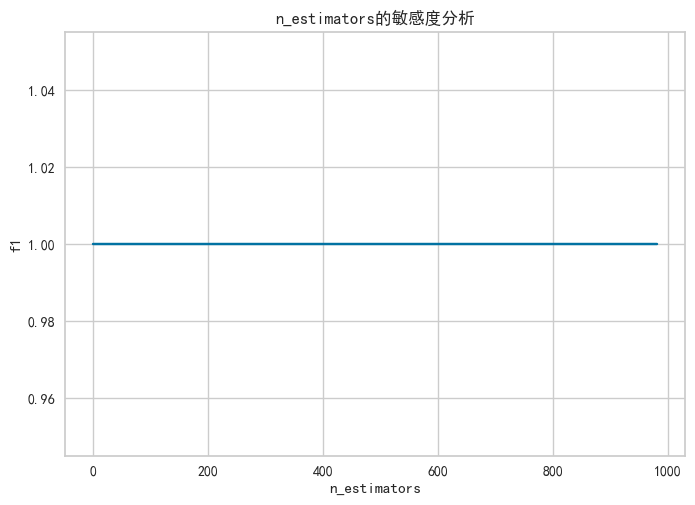

In [95]:
plt.plot(data_X,data_y)
plt.xlabel('n_estimators')
plt.ylabel('f1')
plt.title('n_estimators的敏感度分析')
plt.legend()
plt.savefig('n_estimators的敏感度分析.jpg')
plt.show()

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


43
45
47
49


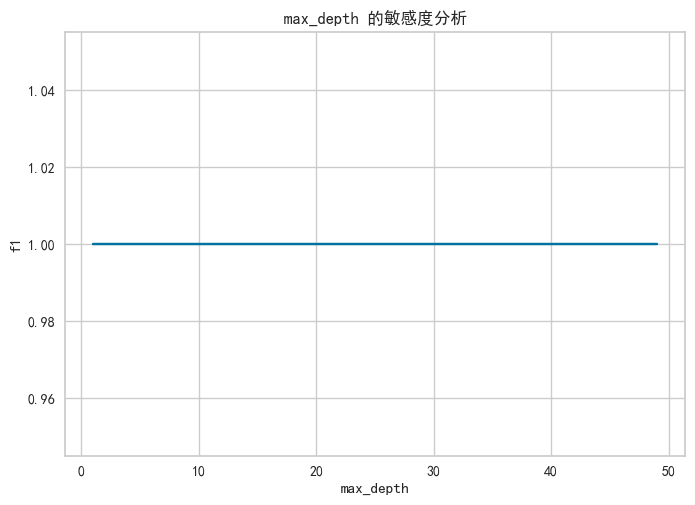

In [96]:
data_X=[]
data_y=[]
for i in range(1,50,2):
    model = RandomForestClassifier(n_estimators=50,max_depth=i)
    model.fit(X, y)
    data_X.append(i)
    data_y.append(f1_score(y,model.predict(X), pos_label="高钾"))
    print(i)
plt.plot(data_X,data_y)
plt.xlabel('max_depth')
plt.ylabel('f1')
plt.title('max_depth 的敏感度分析')
plt.legend()
plt.savefig('max_depth 的敏感度分析.jpg')
plt.show()

问题 4 针对不同类别的玻璃文物样品，分析其化学成分之间的关联关系，并比较不同类别之间的化学成分关联关系的差异性。 

问题（1）：针对不同类别的玻璃文物样品，分析其化学成分之间的关联关系

与问题1的问题（2）类似，只是减少了一个条件——有无风化,相关性分析，MannWhitney U检验，方差分析不能用(该方法不能适用于非正太分布)

问题（2）：比较不同类别之间的化学成分关联关系的差异性。方差检验，卡方检验，和T检验选一种

与问题1的问题（2）类似

In [97]:
data_merge[['类型',  '二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)',
       '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)',
       '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)']].to_excel('4.xlsx',index=None)

In [100]:
## 相关性分析
df1 = data_merge[data_merge['类型']=='高钾']

print(df1.corr())

             二氧化硅(SiO2)  氧化钠(Na2O)  氧化钾(K2O)  氧化钙(CaO)  氧化镁(MgO)  氧化铝(Al2O3)  \
二氧化硅(SiO2)         1.00      -0.47     -0.88     -0.86     -0.65       -0.86   
氧化钠(Na2O)         -0.47       1.00      0.55      0.61     -0.19        0.36   
氧化钾(K2O)          -0.88       0.55      1.00      0.80      0.48        0.66   
氧化钙(CaO)          -0.86       0.61      0.80      1.00      0.32        0.62   
氧化镁(MgO)          -0.65      -0.19      0.48      0.32      1.00        0.75   
氧化铝(Al2O3)        -0.86       0.36      0.66      0.62      0.75        1.00   
氧化铁(Fe2O3)        -0.69      -0.03      0.33      0.47      0.62        0.68   
氧化铜(CuO)          -0.58       0.01      0.36      0.52      0.29        0.34   
氧化铅(PbO)          -0.39       0.36      0.28      0.38      0.21        0.44   
氧化钡(BaO)          -0.34      -0.21      0.10      0.11      0.45        0.39   
五氧化二磷(P2O5)       -0.50      -0.15      0.26      0.09      0.71        0.72   
氧化锶(SrO)          -0.52      -0.18      

<AxesSubplot:>

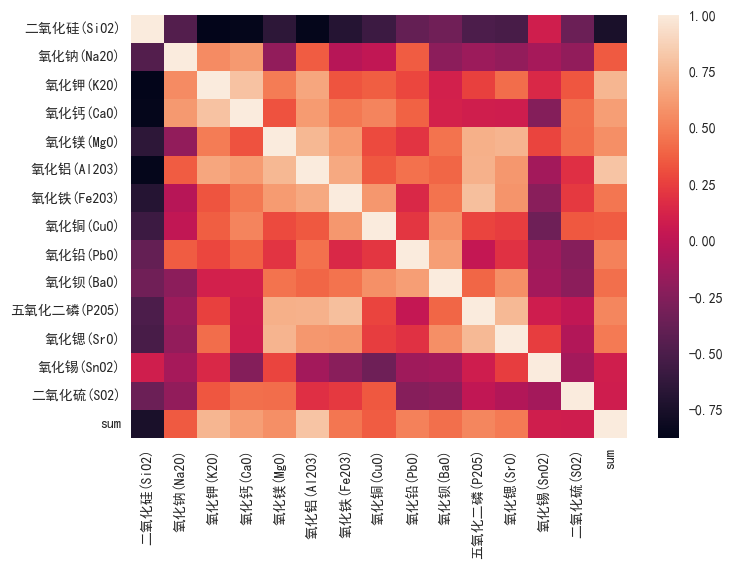

In [101]:
spearman_matrix = df1.corr()
sns.heatmap(spearman_matrix)

             二氧化硅(SiO2)  氧化钠(Na2O)  氧化钾(K2O)  氧化钙(CaO)  氧化镁(MgO)  氧化铝(Al2O3)  \
二氧化硅(SiO2)         1.00      -0.00     -0.42     -0.45      0.14       -0.28   
氧化钠(Na2O)         -0.00       1.00     -0.13     -0.11     -0.01       -0.02   
氧化钾(K2O)          -0.42      -0.13      1.00      0.42      0.21        0.51   
氧化钙(CaO)          -0.45      -0.11      0.42      1.00      0.20        0.19   
氧化镁(MgO)           0.14      -0.01      0.21      0.20      1.00        0.49   
氧化铝(Al2O3)        -0.28      -0.02      0.51      0.19      0.49        1.00   
氧化铁(Fe2O3)        -0.14      -0.35      0.16      0.56      0.17        0.26   
氧化铜(CuO)          -0.50      -0.19     -0.05     -0.35     -0.43       -0.11   
氧化铅(PbO)          -0.56       0.08      0.20      0.72      0.12       -0.17   
氧化钡(BaO)          -0.76      -0.09      0.19     -0.15     -0.32        0.24   
五氧化二磷(P2O5)       -0.29      -0.26      0.20     -0.14     -0.30        0.44   
氧化锶(SrO)          -0.50       0.28     -

<AxesSubplot:>

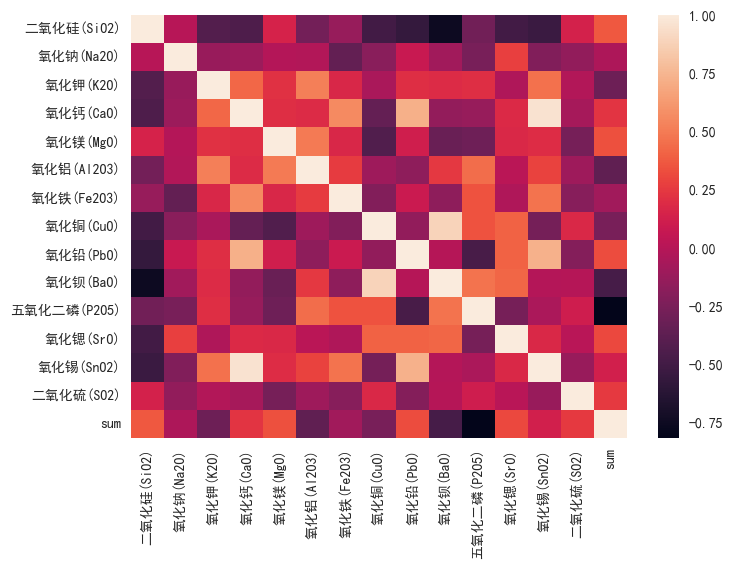

In [102]:
## 相关性分析
df2 = data_merge[data_merge['类型']=='铅钡']

print(df2.corr())
spearman_matrix = df2.corr()
sns.heatmap(spearman_matrix)

pearson相关系数
# 高钾
## 负相关
二氧化硅，氧化钾：-0.88
二氧化硅，氧化钙：-0.82
二氧化硅，氧化铝：-0.83
## 正相关

# 铅钡
## 负相关
## 正相关
氧化铜，氧化钡：0.89
氧化锡,氧化钙：0.95


差异性分析
我们尝试对于高钾和铅钡进行正态检验 ，结果发现不是正态分布，而是偏态分布
Shapiro-Wilk test 做正态假设检验
这里直接将结果放在了**正态检验.xlsx**中
通常正态分布的检验方法有两种，一种是Shapiro-Wilk检验，适用于小样本资料（样本量≤5000）；另一种是Kolmogorov–Smirnov检验，适用于大样本资料（样本量>5000）。
所以我们只观察sk检验的结果，那个ks检验的结果是多余的

分析项：二氧化硅(SiO2)样本N＜5000，采用S-W检验，显著性P值为0.039**，水平上呈现显著性，拒绝原假设，因此数据不满足正态分布，可以进行独立样本MannWhitney检验。
分析项：氧化钠(Na2O)样本N＜5000，采用S-W检验，显著性P值为0.000***，水平上呈现显著性，拒绝原假设，因此数据不满足正态分布，可以进行独立样本MannWhitney检验。
分析项：氧化钾(K2O)样本N＜5000，采用S-W检验，显著性P值为0.000***，水平上呈现显著性，拒绝原假设，因此数据不满足正态分布，可以进行独立样本MannWhitney检验。
分析项：氧化钙(CaO)样本N＜5000，采用S-W检验，显著性P值为0.000***，水平上呈现显著性，拒绝原假设，因此数据不满足正态分布，可以进行独立样本MannWhitney检验。
分析项：氧化镁(MgO)样本N＜5000，采用S-W检验，显著性P值为0.000***，水平上呈现显著性，拒绝原假设，因此数据不满足正态分布，可以进行独立样本MannWhitney检验。
分析项：氧化铝(Al2O3)样本N＜5000，采用S-W检验，显著性P值为0.000***，水平上呈现显著性，拒绝原假设，因此数据不满足正态分布，可以进行独立样本MannWhitney检验。
分析项：氧化铁(Fe2O3)样本N＜5000，采用S-W检验，显著性P值为0.000***，水平上呈现显著性，拒绝原假设，因此数据不满足正态分布，可以进行独立样本MannWhitney检验。
分析项：氧化铜(CuO)样本N＜5000，采用S-W检验，显著性P值为0.000***，水平上呈现显著性，拒绝原假设，因此数据不满足正态分布，可以进行独立样本MannWhitney检验。
分析项：氧化铅(PbO)样本N＜5000，采用S-W检验，显著性P值为0.000***，水平上呈现显著性，拒绝原假设，因此数据不满足正态分布，可以进行独立样本MannWhitney检验。
分析项：氧化钡(BaO)样本N＜5000，采用S-W检验，显著性P值为0.000***，水平上呈现显著性，拒绝原假设，因此数据不满足正态分布，可以进行独立样本MannWhitney检验。
分析项：五氧化二磷(P2O5)样本N＜5000，采用S-W检验，显著性P值为0.000***，水平上呈现显著性，拒绝原假设，因此数据不满足正态分布，可以进行独立样本MannWhitney检验。
分析项：氧化锶(SrO)样本N＜5000，采用S-W检验，显著性P值为0.000***，水平上呈现显著性，拒绝原假设，因此数据不满足正态分布，可以进行独立样本MannWhitney检验。
分析项：氧化锡(SnO2)样本N＜5000，采用S-W检验，显著性P值为0.000***，水平上呈现显著性，拒绝原假设，因此数据不满足正态分布，可以进行独立样本MannWhitney检验。
分析项：二氧化硫(SO2)样本N＜5000，采用S-W检验，显著性P值为0.000***，水平上呈现显著性，拒绝原假设，因此数据不满足正态分布，可以进行独立样本MannWhitney检验。

In [549]:
data_merge.columns

Index(['类型', '二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)',
       '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)',
       '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)', 'sum'],
      dtype='object')

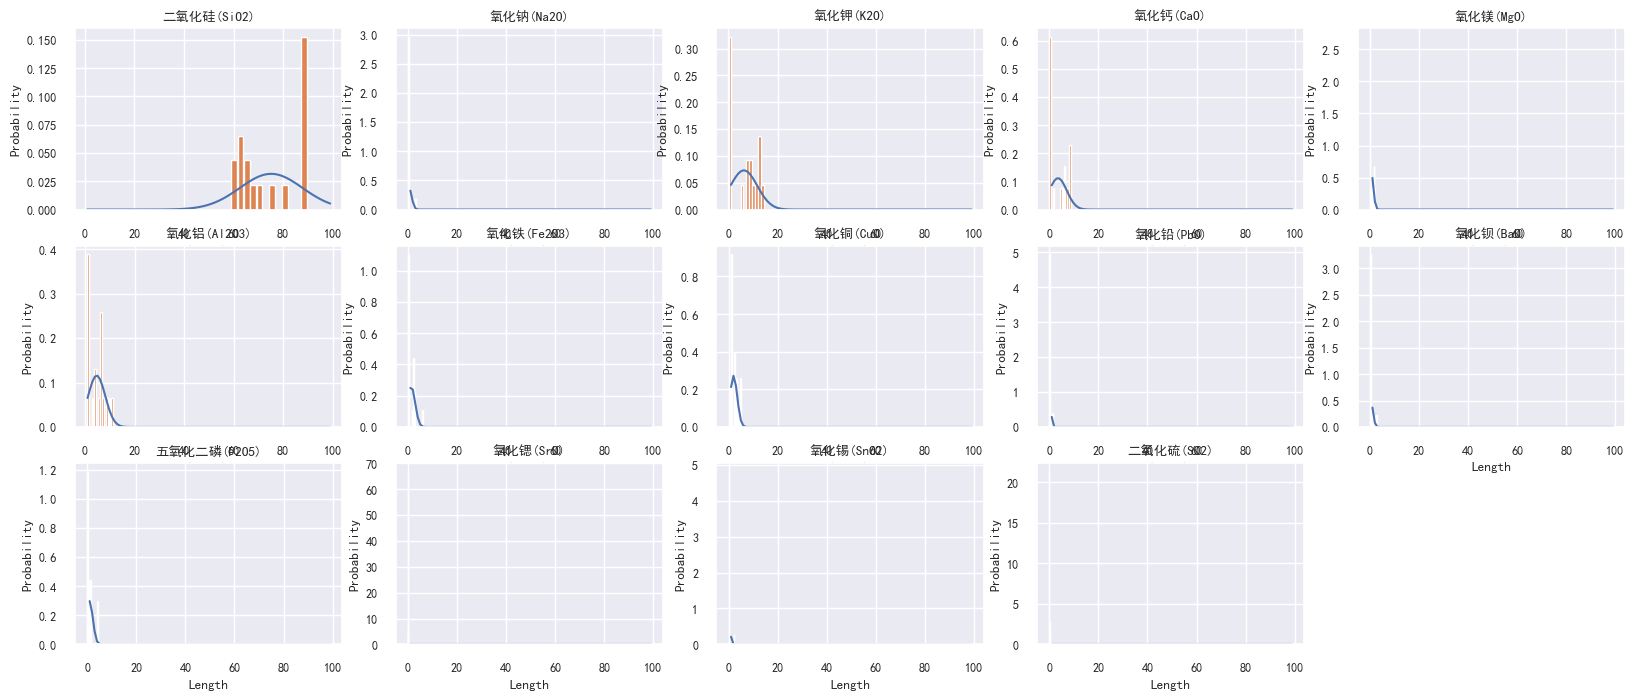

In [550]:
#高钾

import pandas as pd  # pandas是一个强大的分析结构化数据的工具集
import numpy as np  # numpy是Python中科学计算的核心库
import matplotlib.pyplot as plt  # matplotlib数据可视化神器

# 正态分布的概率密度函数
#   x      数据集中的某一具体测量值
#   mu     数据集的平均值，反映测量值分布的集中趋势
#   sigma  数据集的标准差，反映测量值分布的分散程度
def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf

list = ['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)',
       '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)',
       '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)']

if __name__ == '__main__':
    plt.figure()
    for i in range(len(list)):
        plt.subplot(3,5,i+1)
        sns.set(font_scale=0.8)
        plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
        plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
        sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题
        length = df1[list[i]]
        mean = length.mean() # 获得数据集的平均值
        std = length.std()   # 获得数据集的标准差

        # 设定X轴：前两个数字是X轴的起止范围，第三个数字表示步长
        # 步长设定得越小，画出来的正态分布曲线越平滑
        x = np.arange(1, 100, 1)
        # 设定Y轴，载入刚才定义的正态分布函数
        y = normfun(x, mean, std)
        # 绘制数据集的正态分布曲线
        plt.plot(x, y)

        # 绘制数据集的直方图
        plt.hist(length, bins=12, rwidth=0.9, density=True)
        plt.title(list[i])
        plt.xlabel('Length')
        plt.ylabel('Probability')

        # 输出正态分布曲线和直方图
    plt.show()

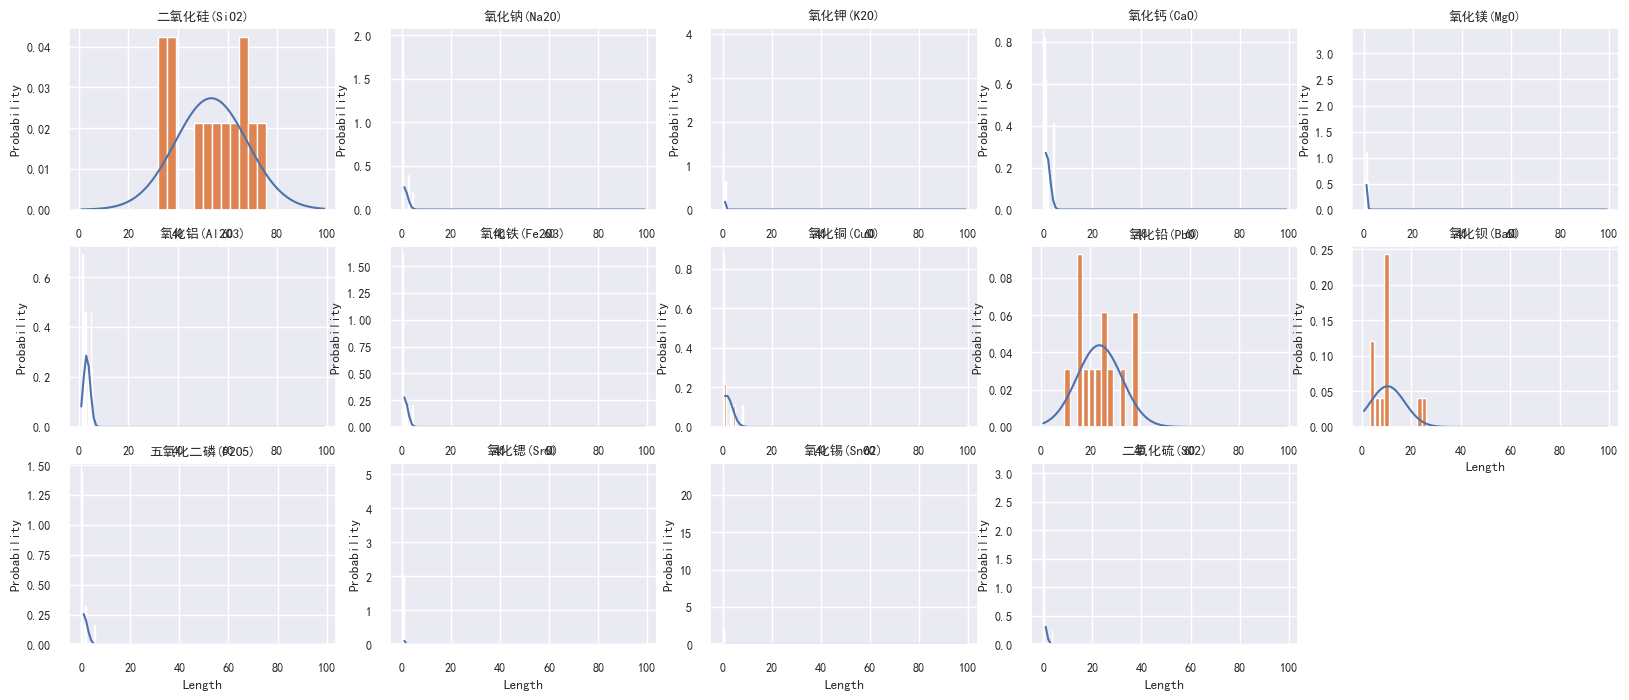

In [551]:

# 铅钡
import pandas as pd  # pandas是一个强大的分析结构化数据的工具集
import numpy as np  # numpy是Python中科学计算的核心库
import matplotlib.pyplot as plt  # matplotlib数据可视化神器

# 正态分布的概率密度函数
#   x      数据集中的某一具体测量值
#   mu     数据集的平均值，反映测量值分布的集中趋势
#   sigma  数据集的标准差，反映测量值分布的分散程度
def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf

list = ['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)', '氧化钙(CaO)', '氧化镁(MgO)',
       '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)', '氧化铅(PbO)', '氧化钡(BaO)',
       '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)', '二氧化硫(SO2)']

if __name__ == '__main__':
    plt.figure()
    for i in range(len(list)):
        plt.subplot(3,5,i+1)
        sns.set(font_scale=0.8)
        plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
        plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
        sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题
        length = df2[list[i]]
        mean = length.mean() # 获得数据集的平均值
        std = length.std()   # 获得数据集的标准差

        # 设定X轴：前两个数字是X轴的起止范围，第三个数字表示步长
        # 步长设定得越小，画出来的正态分布曲线越平滑
        x = np.arange(1, 100, 1)
        # 设定Y轴，载入刚才定义的正态分布函数
        y = normfun(x, mean, std)
        # 绘制数据集的正态分布曲线
        plt.plot(x, y)

        # 绘制数据集的直方图
        plt.hist(length, bins=12, rwidth=0.9, density=True)
        plt.title(list[i])
        plt.xlabel('Length')
        plt.ylabel('Probability')

        # 输出正态分布曲线和直方图
    plt.show()

我们随后分析了MannWhitney U检验，放在MWU.xlsx

高钾、铅钡在二氧化硅(SiO2)上的中位数分别为：68.49/35.78；检验结果P值为0.000***，因此统计结果显著，高钾、铅钡在二氧化硅(SiO2)上存在显著差异；其差异幅度Cohen's d值为：2.063，差异幅度非常大。
高钾、铅钡在氧化钠(Na2O)上的中位数分别为：0.0/0.0；检验结果P值为0.782，因此统计结果不显著，高钾、铅钡在氧化钠(Na2O)上不存在显著差异；其差异幅度Cohen's d值为：0.132，差异幅度非常小。
高钾、铅钡在氧化钾(K2O)上的中位数分别为：7.405/0.0；检验结果P值为0.000***，因此统计结果显著，高钾、铅钡在氧化钾(K2O)上存在显著差异；其差异幅度Cohen's d值为：2.323，差异幅度非常大。
高钾、铅钡在氧化钙(CaO)上的中位数分别为：1.835/1.48；检验结果P值为0.382，因此统计结果不显著，高钾、铅钡在氧化钙(CaO)上不存在显著差异；其差异幅度Cohen's d值为：0.625，差异幅度中等。
高钾、铅钡在氧化镁(MgO)上的中位数分别为：0.755/0.61；检验结果P值为0.357，因此统计结果不显著，高钾、铅钡在氧化镁(MgO)上不存在显著差异；其差异幅度Cohen's d值为：0.24，差异幅度较小。
高钾、铅钡在氧化铝(Al2O3)上的中位数分别为：3.995/3.06；检验结果P值为0.127，因此统计结果不显著，高钾、铅钡在氧化铝(Al2O3)上不存在显著差异；其差异幅度Cohen's d值为：0.342，差异幅度较小。
高钾、铅钡在氧化铁(Fe2O3)上的中位数分别为：0.77/0.23；检验结果P值为0.012**，因此统计结果显著，高钾、铅钡在氧化铁(Fe2O3)上存在显著差异；其差异幅度Cohen's d值为：0.609，差异幅度中等。
高钾、铅钡在氧化铜(CuO)上的中位数分别为：1.6/0.79；检验结果P值为0.063*，因此统计结果不显著，高钾、铅钡在氧化铜(CuO)上不存在显著差异；其差异幅度Cohen's d值为：0.081，差异幅度非常小。
高钾、铅钡在氧化铅(PbO)上的中位数分别为：0.0/31.9；检验结果P值为0.000***，因此统计结果显著，高钾、铅钡在氧化铅(PbO)上存在显著差异；其差异幅度Cohen's d值为：2.614，差异幅度非常大。
高钾、铅钡在氧化钡(BaO)上的中位数分别为：0.0/8.94；检验结果P值为0.000***，因此统计结果显著，高钾、铅钡在氧化钡(BaO)上存在显著差异；其差异幅度Cohen's d值为：1.434，差异幅度非常大。
高钾、铅钡在五氧化二磷(P2O5)上的中位数分别为：0.635/1.41；检验结果P值为0.149，因此统计结果不显著，高钾、铅钡在五氧化二磷(P2O5)上不存在显著差异；其差异幅度Cohen's d值为：0.695，差异幅度中等。
高钾、铅钡在氧化锶(SrO)上的中位数分别为：0.0/0.31；检验结果P值为0.000***，因此统计结果显著，高钾、铅钡在氧化锶(SrO)上存在显著差异；其差异幅度Cohen's d值为：1.441，差异幅度非常大。
高钾、铅钡在氧化锡(SnO2)上的中位数分别为：0.0/0.0；检验结果P值为0.534，因此统计结果不显著，高钾、铅钡在氧化锡(SnO2)上不存在显著差异；其差异幅度Cohen's d值为：0.179，差异幅度非常小。
高钾、铅钡在二氧化硫(SO2)上的中位数分别为：0.0/0.0；检验结果P值为0.703，因此统计结果不显著，高钾、铅钡在二氧化硫(SO2)上不存在显著差异；其差异幅度Cohen's d值为：0.278，差异幅度较小。

In [552]:
df2 = data_merge[data_merge['类型']=='高钾']
df2.describe()

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),sum
count,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00
mean,75.19,0.46,6.27,3.57,0.72,4.69,1.40,2.04,0.27,0.40,0.93,0.03,0.13,0.07,96.18
std,12.63,1.09,5.46,3.57,0.75,3.45,1.55,1.47,0.51,0.84,1.34,0.04,0.56,0.16,3.04
min,59.01,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,92.19
25%,63.15,0.00,0.15,0.06,0.00,0.84,0.35,1.21,0.00,0.00,0.00,0.00,0.00,0.00,92.19
50%,73.00,0.00,7.53,3.36,0.59,4.78,0.46,1.21,0.00,0.00,0.68,0.00,0.00,0.00,97.43
75%,89.59,0.00,10.71,6.92,1.45,6.38,2.32,3.08,0.24,0.00,1.15,0.06,0.00,0.00,98.76
max,89.59,3.38,14.52,8.70,1.98,11.15,6.04,5.09,1.62,2.86,4.50,0.12,2.36,0.47,100.00
